### Data Dictionary

In [175]:
word=pd.read_excel('/Users/edudarrelljockers/Desktop/Ironhack/final project/Leads Data Dictionary.xlsx')
word.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A one-of-a-kind ID that identifies the consumer.
3,NaN,Lead Number,Each lead obtained has a unique lead number.
4,NaN,Lead Origin,"The origin identification by which the consumer was recognized as a lead. API, Landing Page Submission, and so on are all included."


In [176]:
pd.set_option('display.max_colwidth', -1)
word.drop('Unnamed: 0',inplace=True,axis=1)
word.columns = word.iloc[1]
word = word.iloc[2:]
word.reset_index(drop=True, inplace=True)
word.head(len(word))

1,Variables,Description
0,Prospect ID,A one-of-a-kind ID that identifies the consumer.
1,Lead Number,Each lead obtained has a unique lead number.
2,Lead Origin,"The origin identification by which the consumer was recognized as a lead. API, Landing Page Submission, and so on are all included."
3,Lead Source,"The source of the lead. Google, Organic Search, Olark Chat, and other services are included."
4,Do Not Email,A customer-selected indicator variable in which they indicate whether or not they wish to be emailed about the course.
5,Do Not Call,An indication variable used by the consumer in which they indicate whether or not they wish to be contacted about the course.
6,Converted,The variable to be targeted. Indicates if a lead was effectively converted or not.
7,TotalVisits,The total number of website visits made by the consumer.
8,Total Time Spent on Website,The overall amount of time spent by the consumer on the website.
9,Page Views Per Visit,The average number of pages seen on the website throughout the visits.


## Python Libraries
### Import Python Libraries

In [177]:
#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
from collections import Counter

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

# Machine Learning Libraries

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

### Suppress Warnings

In [178]:
import warnings
warnings.filterwarnings('ignore')

### Setting up Jupyter View

In [179]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Reading & Understanding the data
### Importing the Input file

In [180]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [181]:
lead = pd.read_csv("/Users/edudarrelljockers/Desktop/Ironhack/final project/Lead Scoring.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [182]:
lead.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.00,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.00,17.00,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.00,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,19.00,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.00,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.00,20.00,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.00,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.00,16.00,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.00,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.00,18.00,No,Yes,Modified


### Inspect Dataframe

In [183]:
#database dimension
print("Database dimension     :",lead.shape)
print("Database size          :",lead.size)
print("Number of Row          :",len(lead.index))
print("Number of Columns      :",len(lead.columns))

Database dimension     : (9240, 37)
Database size          : 341880
Number of Row          : 9240
Number of Columns      : 37


In [184]:
#checking numerical columns statistics
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [185]:
#info about the column types etc. 
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Column data types include float, integer, and object. We can observe that the column has some null values. Let's start with the null values.

### Null Value Calculation
There are several columns with 'Select' as one of the categories. This is most likely due to the fact that the person did not fill out that field. This field will be replaced by NaN.

In [186]:
lead = lead.replace('Select', np.nan)

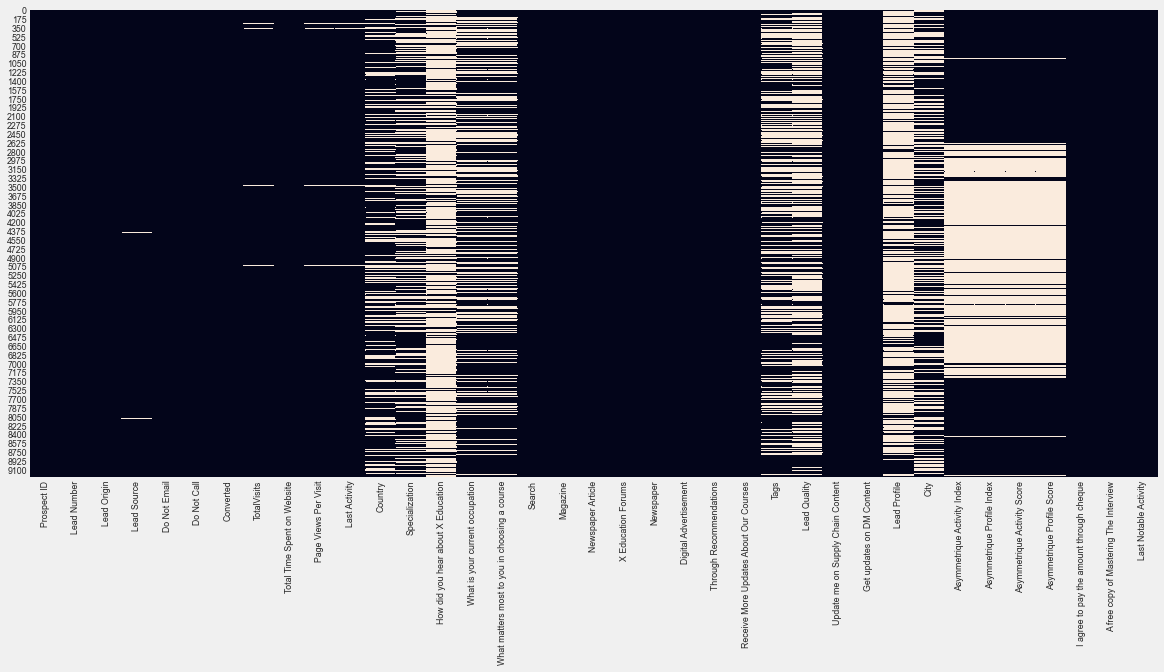

In [187]:
plt.figure(figsize = (18,8))
sns.heatmap(lead.isnull(),cbar = False)
plt.show()

#### Column wise Null Value calculation

In [188]:
#Column wise null values in train data set 
null_perc = pd.DataFrame(round((lead.isnull().sum())*100/lead.shape[0],2)).reset_index()
null_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(lead.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
null_lead = pd.merge(null_value, null_perc, on='Column Name')
null_lead.sort_values("Null Values", ascending = False)

,Column Name,Null Values,Null Values Percentage
13,How did you hear about X Education,7250,78.46
28,Lead Profile,6855,74.19
25,Lead Quality,4767,51.59
33,Asymmetrique Profile Score,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
30,Asymmetrique Activity Index,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
29,City,3669,39.71
12,Specialization,3380,36.58
24,Tags,3353,36.29


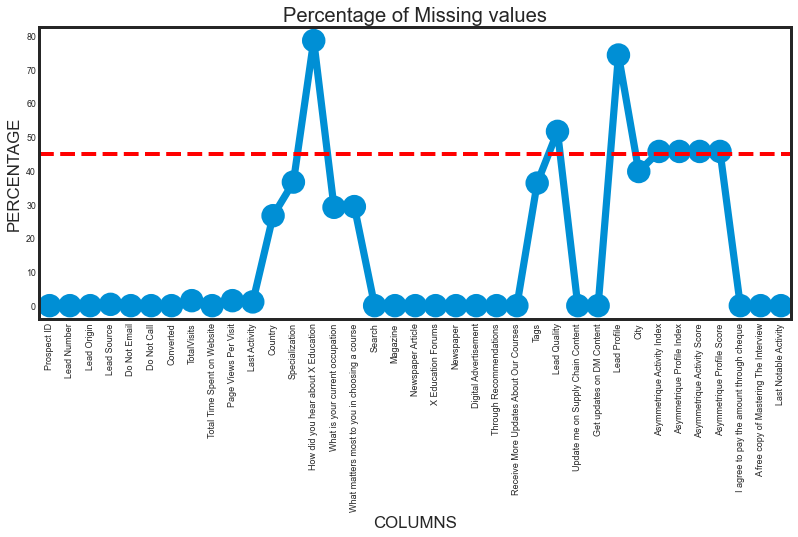

In [189]:
#plotting the null value percentage
sns.set_style("white")
fig = plt.figure(figsize=(12,5))
null_lead = pd.DataFrame((lead.isnull().sum())*100/lead.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_lead)
plt.xticks(rotation =90,fontsize =9)
ax.axhline(45, ls='--',color='red')
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

### Row wise Null Value calculation

In [190]:
Row_Null50_Count = len(lead[lead.isnull().sum(axis=1)/lead.shape[1]>0.5])
print( 'Total number of rows with more than 50% null values are : ', Row_Null50_Count)

Total number of rows with more than 50% null values are :  0


There are 17 columns with no data. Seven columns contain more than 45 percent unknowns and should be eliminated. There are no rows with more than 50% null values.

### Duplicate Analysis

In [191]:
print("Total number of duplicate values in Prospect ID column :" , lead.duplicated(subset = 'Prospect ID').sum())
print("Total number of duplicate values in Lead Number column :" , lead.duplicated(subset = 'Lead Number').sum())

Total number of duplicate values in Prospect ID column : 0
Total number of duplicate values in Lead Number column : 0


Because the Prospect ID and Lead number are both unique, we won't need to make any predictions.

## Data Cleaning
### Delete High Null Columns
Clearly, Prospect ID and Lead Number are two variables that are only indicative of the Contacted People's ID number and may be removed. We'll also delete columns with more than 45 percent Null Values. In addition, other factors, such as Lead Quality, Tags, Asymmetrique scores, and profile, are established by the sales team once they contact the potential lead. These variables will not be available for model construction since these attributes will not be available until the lead is contacted. Last Notable Activity is a transitional column that provides an update when the sales team person is in contact with the lead.
As a result, we may remove these columns as well.

In [192]:
cols_to_drop = ['Prospect ID','Lead Number','How did you hear about X Education','Lead Profile',
                'Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score',
               'Asymmetrique Activity Index','Asymmetrique Profile Index','Tags','Last Notable Activity']

In [193]:
#dropping unnecessary columns
lead.drop(cols_to_drop, 1, inplace = True)
len(lead.columns)

26

Insight:
We successfully eliminated ten columns where the columns had a significant number of null values or were information that would not be available to models when they run since they are computed / picked by sales professionals when they contact potential prospects.

### Segregating Categorical & Numerical Values

In [194]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
numerical_col = lead.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical_col))
print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

CATEGORICAL FEATURES : 
 ['Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call' 'Last Activity'
 'Country' 'Specialization' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses'
 'Update me on Supply Chain Content' 'Get updates on DM Content' 'City'
 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview'] 


NUMERICAL FEATURES : 
 ['Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit'] 


### Categorical Columns Null Value Treatment

In [195]:
# Checking unique values and null values for the categorical columns
def Cat_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [196]:
df_cat = Cat_info(lead, categorical_col)
df_cat

,values,unique_values,null_values,null_percent
columns,,,,
City,"[nan, Mumbai, Thane & Outskirts, Other Metro Cities, Other Cities, Other Cities of Maharashtra, Tier II Cities]",6,3669,39.70
Specialization,"[nan, Business Administration, Media and Advertising, Supply Chain Management, IT Projects Management, Finance Management, Travel and Tourism, Human Resource Management, Marketing Management, Banking, Investment And Insurance, International Business, E-COMMERCE, Operations Management, Retail Management, Services Excellence, Hospitality Management, Rural and Agribusiness, Healthcare Management, E-Business]",18,3380,36.60
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & Convenience, Other]",3,2709,29.30
What is your current occupation,"[Unemployed, Student, nan, Working Professional, Businessman, Other, Housewife]",6,2690,29.10
Country,"[nan, India, Russia, Kuwait, Oman, United Arab Emirates, United States, Australia, United Kingdom, Bahrain, Ghana, Singapore, Qatar, Saudi Arabia, Belgium, France, Sri Lanka, China, Canada, Netherlands, Sweden, Nigeria, Hong Kong, Germany, Asia/Pacific Region, Uganda, Kenya, Italy, South Africa, Tanzania, unknown, Malaysia, Liberia, Switzerland, Denmark, Philippines, Bangladesh, Vietnam, Indonesia]",38,2461,26.60
Last Activity,"[Page Visited on Website, Email Opened, Unreachable, Converted to Lead, Olark Chat Conversation, Email Bounced, Email Link Clicked, Form Submitted on Website, Unsubscribed, Had a Phone Conversation, View in browser link Clicked, nan, Approached upfront, SMS Sent, Visited Booth in Tradeshow, Resubscribed to emails, Email Received, Email Marked Spam]",17,103,1.10
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, Google, Referral Sites, Welingak Website, Reference, google, Facebook, nan, blog, Pay per Click Ads, bing, Social Media, WeLearn, Click2call, Live Chat, welearnblog_Home, youtubechannel, testone, Press_Release, NC_EDM]",21,36,0.40
Lead Origin,"[API, Landing Page Submission, Lead Add Form, Lead Import, Quick Add Form]",5,0,0.00
Digital Advertisement,"[No, Yes]",2,0,0.00


Insights:
- Some columns contain just one category. For example, I agree to pay the sum via check for a magazine. These columns offer no value to the model and may be removed.
- One of the values in several of the columns is "Select." These must be regarded as null values. These columns' data values must be adjusted.

In [197]:
# Appending the columns to col_to_drop where only 1 category value is present
cols_to_drop = df_cat[df_cat['unique_values']==1].index.values.tolist() 
cols_to_drop

['I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Magazine']

In [198]:
#dropping unnecessary columns
lead.drop(cols_to_drop, 1, inplace = True)
len(lead.columns)

21

In [199]:
# Checking the new null value and column details for Categorical columns

categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
new_cat = Cat_info(lead, categorical_col)
new_cat

,values,unique_values,null_values,null_percent
columns,,,,
City,"[nan, Mumbai, Thane & Outskirts, Other Metro Cities, Other Cities, Other Cities of Maharashtra, Tier II Cities]",6,3669,39.70
Specialization,"[nan, Business Administration, Media and Advertising, Supply Chain Management, IT Projects Management, Finance Management, Travel and Tourism, Human Resource Management, Marketing Management, Banking, Investment And Insurance, International Business, E-COMMERCE, Operations Management, Retail Management, Services Excellence, Hospitality Management, Rural and Agribusiness, Healthcare Management, E-Business]",18,3380,36.60
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & Convenience, Other]",3,2709,29.30
What is your current occupation,"[Unemployed, Student, nan, Working Professional, Businessman, Other, Housewife]",6,2690,29.10
Country,"[nan, India, Russia, Kuwait, Oman, United Arab Emirates, United States, Australia, United Kingdom, Bahrain, Ghana, Singapore, Qatar, Saudi Arabia, Belgium, France, Sri Lanka, China, Canada, Netherlands, Sweden, Nigeria, Hong Kong, Germany, Asia/Pacific Region, Uganda, Kenya, Italy, South Africa, Tanzania, unknown, Malaysia, Liberia, Switzerland, Denmark, Philippines, Bangladesh, Vietnam, Indonesia]",38,2461,26.60
Last Activity,"[Page Visited on Website, Email Opened, Unreachable, Converted to Lead, Olark Chat Conversation, Email Bounced, Email Link Clicked, Form Submitted on Website, Unsubscribed, Had a Phone Conversation, View in browser link Clicked, nan, Approached upfront, SMS Sent, Visited Booth in Tradeshow, Resubscribed to emails, Email Received, Email Marked Spam]",17,103,1.10
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, Google, Referral Sites, Welingak Website, Reference, google, Facebook, nan, blog, Pay per Click Ads, bing, Social Media, WeLearn, Click2call, Live Chat, welearnblog_Home, youtubechannel, testone, Press_Release, NC_EDM]",21,36,0.40
X Education Forums,"[No, Yes]",2,0,0.00
Through Recommendations,"[No, Yes]",2,0,0.00


Now we can proceed with addressing individual columns for null values

#### City

In [200]:
lead['City'].value_counts(normalize=True)*100

Mumbai                        57.84
Thane & Outskirts             13.50
Other Cities                  12.31
Other Cities of Maharashtra   8.20 
Other Metro Cities            6.82 
Tier II Cities                1.33 
Name: City, dtype: float64

In [201]:
# Let's check how City and Country are connected with each other
lead.groupby(['Country','City'])['Country'].count()

Country               City                       
Australia             Mumbai                         6   
                      Other Cities                   2   
                      Thane & Outskirts              3   
Bahrain               Mumbai                         1   
                      Other Cities                   2   
                      Other Cities of Maharashtra    1   
                      Thane & Outskirts              2   
                      Tier II Cities                 1   
Bangladesh            Other Cities                   2   
Belgium               Mumbai                         1   
                      Thane & Outskirts              1   
Canada                Mumbai                         3   
China                 Mumbai                         1   
Denmark               Other Cities                   1   
France                Other Cities                   2   
                      Other Cities of Maharashtra    2   
                      

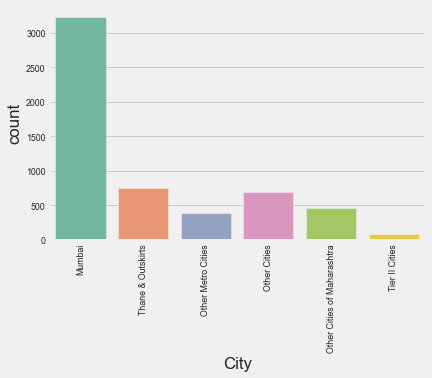

In [202]:
style.use('fivethirtyeight')
ax = sns.countplot(lead['City'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

Because there are over 40% unknown values, we cannot impute using mean because it skews the entire dataset. X-Education is also an online teaching platform. The city information will be ineffective because potential students can access any course online regardless of their location. We shall remove the column from the analysis.

In [203]:
lead.drop("City",axis=1, inplace = True)
len(lead.columns)

20

#### Specialization

In [204]:
lead['Specialization'].value_counts(normalize = True)*100

Finance Management                  16.66
Human Resource Management           14.47
Marketing Management                14.30
Operations Management               8.58 
Business Administration             6.88 
IT Projects Management              6.25 
Supply Chain Management             5.96 
Banking, Investment And Insurance   5.77 
Media and Advertising               3.46 
Travel and Tourism                  3.46 
International Business              3.04 
Healthcare Management               2.71 
Hospitality Management              1.95 
E-COMMERCE                          1.91 
Retail Management                   1.71 
Rural and Agribusiness              1.25 
E-Business                          0.97 
Services Excellence                 0.68 
Name: Specialization, dtype: float64

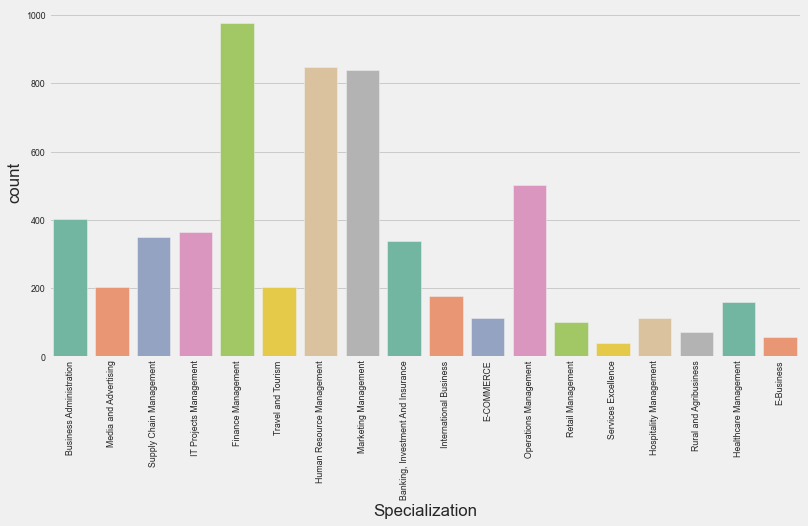

In [205]:
plt.figure(figsize=(12,6))
ax = sns.countplot(lead['Specialization'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

Insight:
It's conceivable that the lead has no speciality or that he or she is a student with no job experience yet, in which case he or she hasn't entered any value. To replace the null values, we'll add a new category named 'Others.'

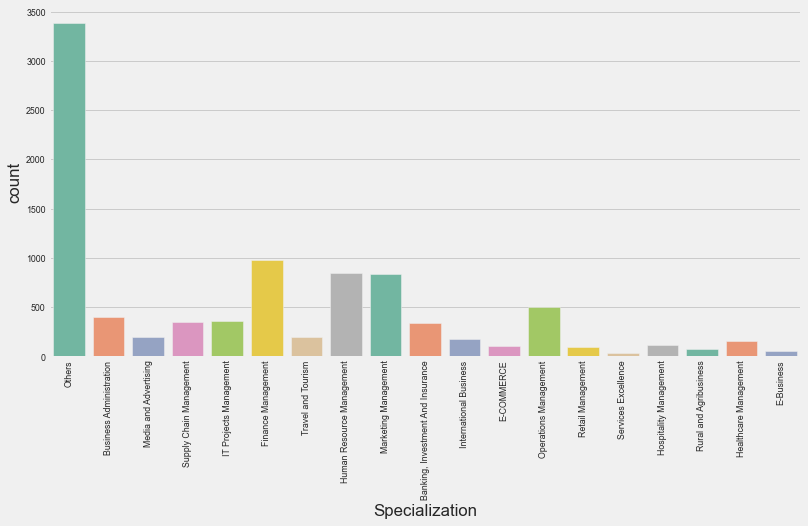

In [206]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')
plt.figure(figsize=(12,6))
ax = sns.countplot(lead['Specialization'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

#### What matters most to you in choosing a course

In [207]:
lead['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects     99.95
Flexibility & Convenience   0.03 
Other                       0.02 
Name: What matters most to you in choosing a course, dtype: float64

Insight: We can eliminate the column since the data is distorted.

In [208]:
lead.drop('What matters most to you in choosing a course', axis = 1, inplace=True)
len(lead.columns)

19

#### What is your current occupation

In [209]:
lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed             85.50
Working Professional   10.78
Student                3.21 
Other                  0.24 
Housewife              0.15 
Businessman            0.12 
Name: What is your current occupation, dtype: float64

Insight: "Unemployed" accounts for 85.5 percent of the values. The data will become more biased if we impute it as "Unemployed." As a result, we will assign the value "Unknown."

In [210]:
#lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unknown')
lead['What is your current occupation'].value_counts(normalize = True)*100

Unemployed             60.61
Unknown                29.11
Working Professional   7.64 
Student                2.27 
Other                  0.17 
Housewife              0.11 
Businessman            0.09 
Name: What is your current occupation, dtype: float64

#### Country

In [211]:
#Let's check how is the Country data distributed
lead['Country'].value_counts(normalize=True)

India                  0.96
United States          0.01
United Arab Emirates   0.01
Singapore              0.00
Saudi Arabia           0.00
United Kingdom         0.00
Australia              0.00
Qatar                  0.00
Hong Kong              0.00
Bahrain                0.00
France                 0.00
Oman                   0.00
unknown                0.00
Germany                0.00
Canada                 0.00
Kuwait                 0.00
Nigeria                0.00
South Africa           0.00
Sweden                 0.00
China                  0.00
Ghana                  0.00
Asia/Pacific Region    0.00
Bangladesh             0.00
Italy                  0.00
Philippines            0.00
Netherlands            0.00
Uganda                 0.00
Belgium                0.00
Denmark                0.00
Vietnam                0.00
Russia                 0.00
Liberia                0.00
Sri Lanka              0.00
Malaysia               0.00
Switzerland            0.00
Kenya               

Insight: The country data is severely skewed, with India accounting for 95 percent of the statistics. Country data, like city data, is not necessary for Model construction because X-Education is an online platform. We will also remove the nation columns.

In [212]:
lead.drop('Country', axis = 1, inplace = True)
len(lead.columns)

18

#### Last Activity

In [213]:
print("Number of null values in Last Activity column is : ", lead['Last Activity'].isnull().sum())
print("Percentage of null values in Last Activity column is : ", round(lead['Last Activity'].isnull().sum()/lead.shape[0]*100,2))

Number of null values in Last Activity column is :  103
Percentage of null values in Last Activity column is :  1.11


In [214]:
lead['Last Activity'].value_counts(normalize = True)*100

Email Opened                   37.62
SMS Sent                       30.04
Olark Chat Conversation        10.65
Page Visited on Website        7.00 
Converted to Lead              4.68 
Email Bounced                  3.57 
Email Link Clicked             2.92 
Form Submitted on Website      1.27 
Unreachable                    1.02 
Unsubscribed                   0.67 
Had a Phone Conversation       0.33 
Approached upfront             0.10 
View in browser link Clicked   0.07 
Email Received                 0.02 
Email Marked Spam              0.02 
Visited Booth in Tradeshow     0.01 
Resubscribed to emails         0.01 
Name: Last Activity, dtype: float64

Insight: Because we don't know what the Last action was, we'll substitute it with the most common activity, "Email Opened."

In [215]:
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Email Opened')
print("Number of null values in Last Activity column is : ", lead['Last Activity'].isnull().sum())

Number of null values in Last Activity column is :  0


#### Lead Source

In [216]:
print("Number of null values in Lead Source column is : ", lead['Lead Source'].isnull().sum())
print("Percentage of null values in Lead Source column is : ", round(lead['Lead Source'].isnull().sum()/lead.shape[0]*100,2))

Number of null values in Lead Source column is :  36
Percentage of null values in Lead Source column is :  0.39


In [217]:
lead['Lead Source'].value_counts(normalize = True)*100

Google              31.16
Direct Traffic      27.63
Olark Chat          19.07
Organic Search      12.54
Reference           5.80 
Welingak Website    1.54 
Referral Sites      1.36 
Facebook            0.60 
bing                0.07 
google              0.05 
Click2call          0.04 
Press_Release       0.02 
Live Chat           0.02 
Social Media        0.02 
WeLearn             0.01 
blog                0.01 
NC_EDM              0.01 
youtubechannel      0.01 
Pay per Click Ads   0.01 
testone             0.01 
welearnblog_Home    0.01 
Name: Lead Source, dtype: float64

Insight: Because Google appears to be the most popular Lead Source, we will replace null values with Google. There is a category called 'google,' which is synonymous with 'Google.' We will change the settings.

In [218]:
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
print("Number of null values in Lead Source column is : ", lead['Lead Source'].isnull().sum())

Number of null values in Lead Source column is :  0


Insight: All Categorical Columns have been correctly imputed. Let's have a look at some number columns now.

#### Numerical Columns Null Value Treatment

In [219]:
# Checking unique values and null values for the categorical columns
def Num_info(df, numeric_column):
    df_result = pd.DataFrame(columns=["columns","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in numeric_column:
        df_temp["columns"] = [value]
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [220]:
df_num = Num_info(lead,numerical_col)
df_num

,null_values,null_percent
columns,,
TotalVisits,137,1.50
Page Views Per Visit,137,1.50
Converted,0,0.00
Total Time Spent on Website,0,0.00


#### Total Visits

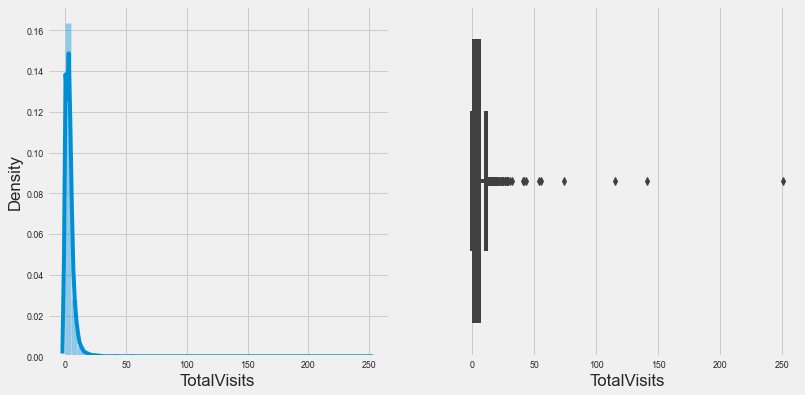

In [221]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['TotalVisits'])
plt.subplot(1,2,2)
sns.boxplot(lead['TotalVisits'])
plt.show()

Insight: Because there are several outliers in the data, we will impute with the median value rather than the mean value.

In [222]:
lead['TotalVisits'].fillna(lead['TotalVisits'].median(), inplace=True)
lead['TotalVisits'].isnull().sum()

0

#### Page Views Per Visit

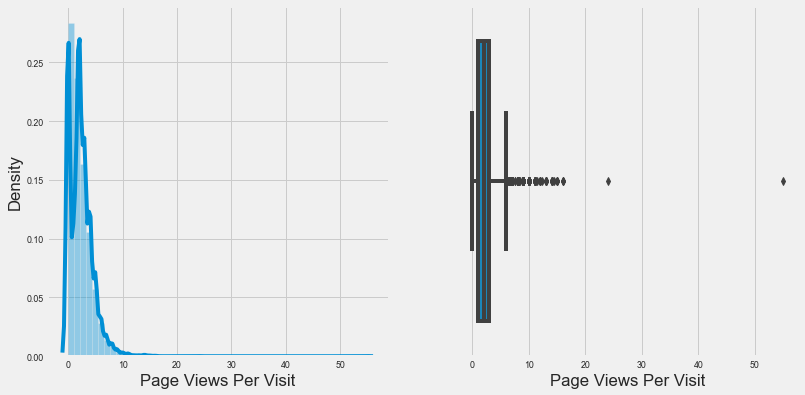

In [223]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

Insight: Because there are several outliers in the data, we will impute with the median value rather than the mean value.

In [224]:
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(), inplace=True)
lead['Page Views Per Visit'].isnull().sum()

0

## Exploratory Data Analysis
### Data Imbalance

In [225]:
converted = lead['Converted'].value_counts().rename_axis('unique_values').to_frame('counts')
converted

,counts
unique_values,
0,5679
1,3561


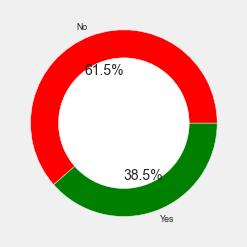

In [226]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(converted.counts, labels = ['No','Yes'],colors = ['red','green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Insight: In terms of lead conversion ratio, 38.5 percent turned to leads, whereas 61.5 percent did not. As a result, it appears to be a well-balanced dataset.

### Graph Functions

Insight: The majority of the characteristics in the dataset are categorical in nature. Let us start by doing segmented univariate analysis on each category feature. We will look at bar graphs that display the overall number of converted and non-converted leads in each category.

In [227]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

In [228]:
# Renaming some of the column headers which has long header

lead.rename(columns={'What is your current occupation': 'Occupation', 
                     'Through Recommendations': 'Recommendation',
                     'A free copy of Mastering The Interview': 'Free Copy'                   
                    },inplace = True)
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendation', 'Free Copy'],
      dtype='object')

### Univariate Analysis - Categorical
#### Lead Origin

In [230]:
#Run the function to get plot categorical plots 
univariate_categorical("Lead Origin",label_rotation=True)

NameError: name 'univariate_categorical' is not defined

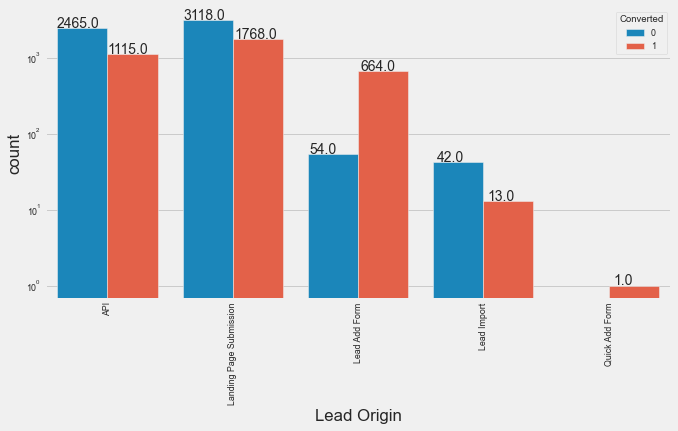

In [231]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Lead Origin", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Insights: 
- The majority of leads come from landing page submissions, and around 38% of them are converted, followed by API submissions, which account for approximately 30% of all conversions.
- Despite the fact that Lead Origins from Quick Add Form are 100% Converted, there was only one lead from that category. Leads via the Lead Add Form are the second largest conversions in this category, accounting for about 90% of the 718 leads.
- Lead imports are few in number, and the conversion rate is likewise poor.
To increase total lead conversion rates, we must focus more on boosting lead conversion from API and Landing Page Submission origins and generating more leads through Lead Add Form.

#### Lead Source

In [68]:
#Run the function to get plot categorical plots
univariate_categorical("Lead Source",label_rotation=True)

NameError: name 'univariate_categorical' is not defined

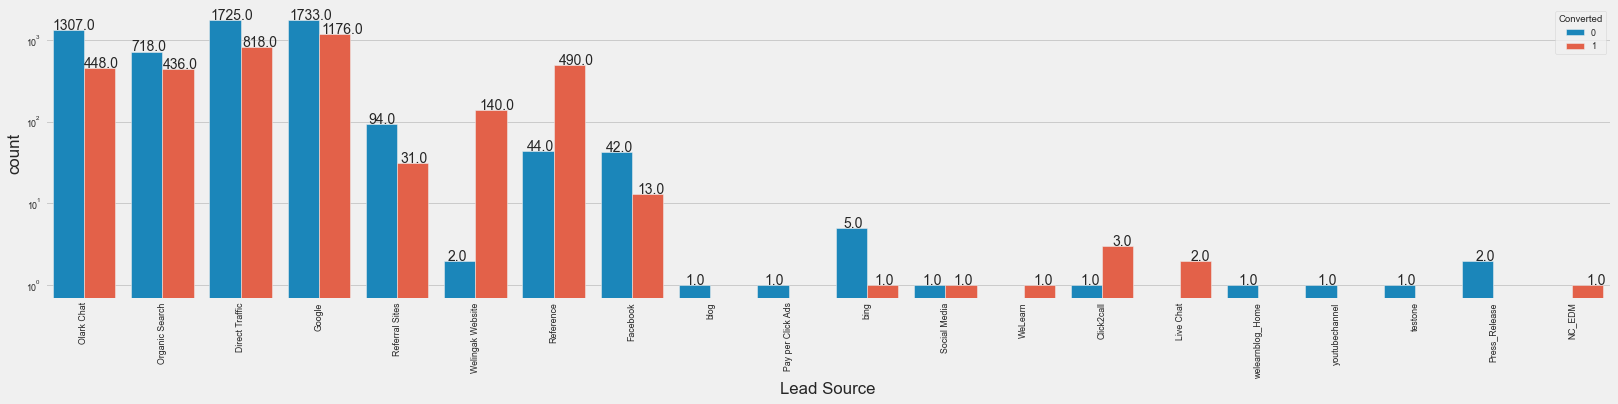

In [232]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Strategy: Smaller lead sources will be grouped together as 'Others.'

In [69]:
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Sources')

In [233]:
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

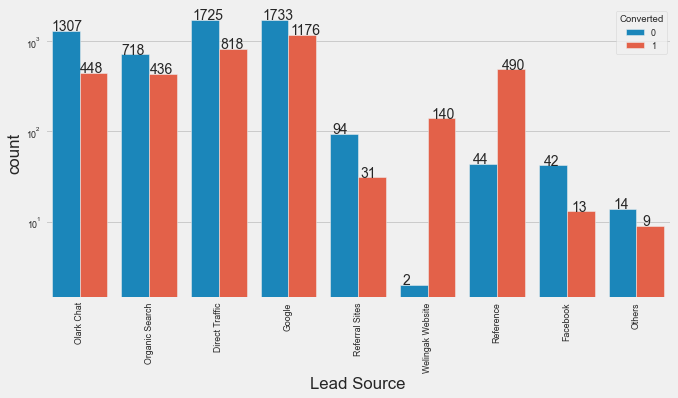

In [234]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [235]:
#Running the function again to check the updated statistics
univariate_categorical("Lead Source",label_rotation=True)

NameError: name 'univariate_categorical' is not defined

Insight:
- The source of the most leads was Google, which converted 40% of the leads, followed by Direct Traffic, Organic Search, and Olark Chat, which converted roughly 35%, 38%, and 30%, respectively.
- From a total of 534 leads, a lead generated by a referral had a conversion rate of more than 90%.
- The lead conversion rate on the Welingak website is around 100 percent. This option should be investigated further in order to boost lead conversion.

To enhance the number of leads, measures should be implemented to encourage existing members to refer more people.

#### Do not Email & Do not Call

In [71]:
#Run the function to get plot categorical plots
univariate_categorical("Do Not Email")

NameError: name 'univariate_categorical' is not defined

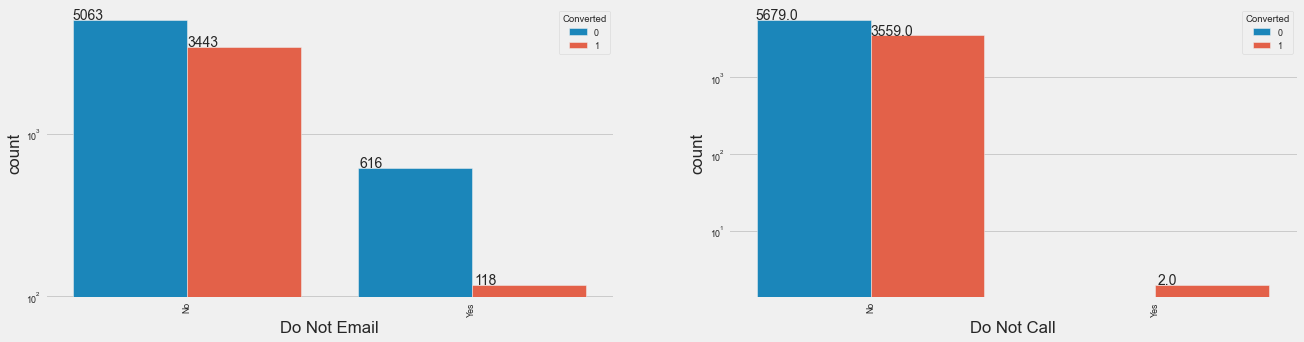

In [237]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
ax= sns.countplot(x = "Do Not Email", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.subplot(1,2,2)
ax= sns.countplot(x = "Do Not Call", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Insight: 
- The vast majority of individuals (92 percent) are content with getting email.
- People that are comfortable with email have a conversion rate of 40%.
- People who have opted out of receive email has lower rate of conversion (only 15%)

#### Last Activity

In [72]:
#Run the function to get plot categorical plots
univariate_categorical("Last Activity",label_rotation=True)

NameError: name 'univariate_categorical' is not defined

In [238]:
lead['Last Activity'].describe()

count     9240        
unique    17          
top       Email Opened
freq      3540        
Name: Last Activity, dtype: object

In [239]:
lead['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation         973 
Page Visited on Website         640 
Converted to Lead               428 
Email Bounced                   326 
Email Link Clicked              267 
Form Submitted on Website       116 
Unreachable                     93  
Unsubscribed                    61  
Had a Phone Conversation        30  
Approached upfront              9   
View in browser link Clicked    6   
Email Received                  2   
Email Marked Spam               2   
Visited Booth in Tradeshow      1   
Resubscribed to emails          1   
Name: Last Activity, dtype: int64

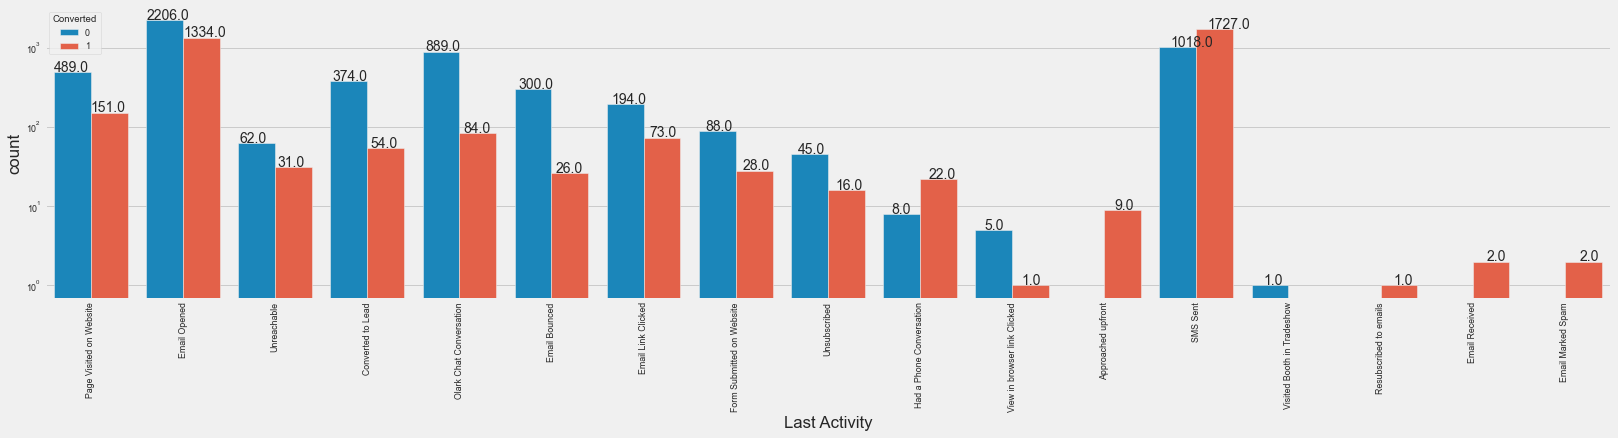

In [240]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Strategy: Smaller Last Activity numbers will be combined as 'Other Activity.'

In [241]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

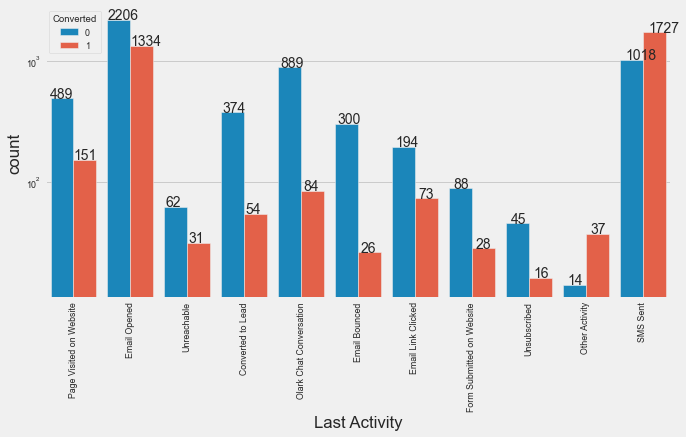

In [242]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [74]:
#Run the function to get plot categorical plots
univariate_categorical("Last Activity",label_rotation=True)

NameError: name 'univariate_categorical' is not defined

Insight:
- As their most recent activity, the majority of the leads have opened their email.
- Lead conversion is quite high (70 percent) after merging smaller Last Activity kinds like Other Activity.
- The conversion rate for leads with the most recent activity as SMS Sent is around 60%.

#### Specialization

In [76]:
#Run the function to get plot categorical plots
univariate_categorical("Specialization",label_rotation=True)

NameError: name 'univariate_categorical' is not defined

In [244]:
lead.Specialization.describe()

count     9240  
unique    19    
top       Others
freq      3380  
Name: Specialization, dtype: object

In [245]:
lead.Specialization.value_counts()

Others                               3380
Finance Management                   976 
Human Resource Management            848 
Marketing Management                 838 
Operations Management                503 
Business Administration              403 
IT Projects Management               366 
Supply Chain Management              349 
Banking, Investment And Insurance    338 
Media and Advertising                203 
Travel and Tourism                   203 
International Business               178 
Healthcare Management                159 
Hospitality Management               114 
E-COMMERCE                           112 
Retail Management                    100 
Rural and Agribusiness               73  
E-Business                           57  
Services Excellence                  40  
Name: Specialization, dtype: int64

In [246]:
lead['Specialization'] = lead['Specialization'].replace(['Others'], 'Other_Specialization')

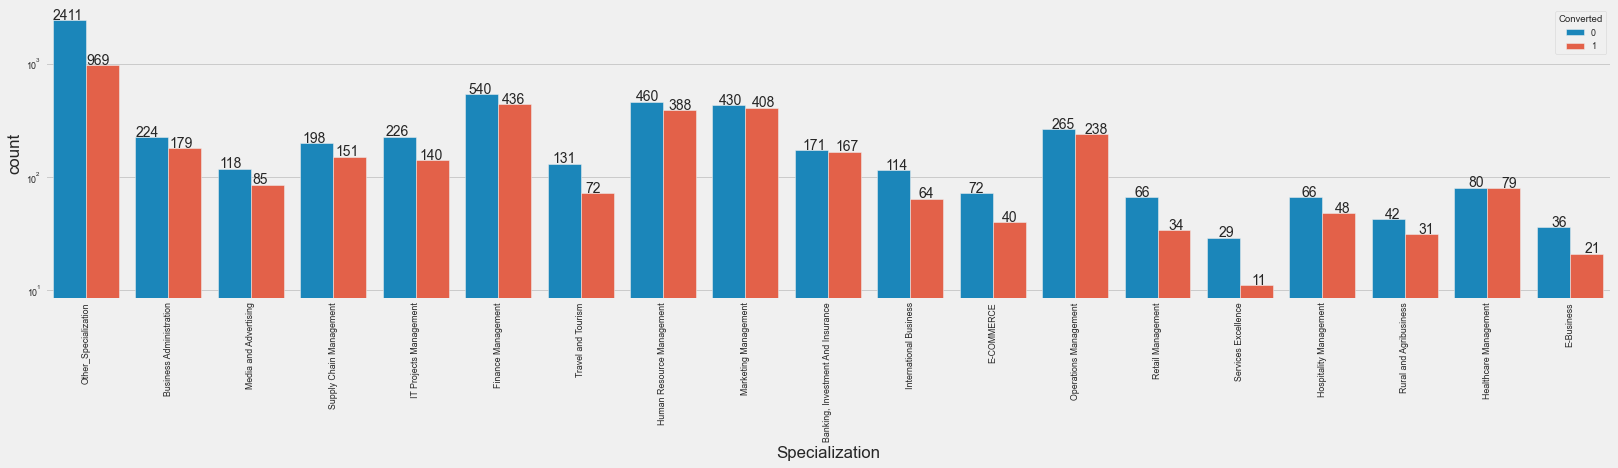

In [247]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Specialization", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Insight: 
- The majority of leads did not specify a specialty, and around 28% of those who converted did so.
- Leads with Finance management and Marketing Management - Over 45% Converted

#### Occupation

In [77]:
#Run the function to get plot categorical plots
univariate_categorical("Occupation",label_rotation=True)

NameError: name 'univariate_categorical' is not defined

In [250]:
lead['Occupation'].describe()

count     9240      
unique    7         
top       Unemployed
freq      5600      
Name: Occupation, dtype: object

In [251]:
lead['Occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional    706 
Student                 210 
Other                   16  
Housewife               10  
Businessman             8   
Name: Occupation, dtype: int64

In [253]:
lead['Occupation'] = lead['Occupation'].replace(['Other'], 'Other_Occupation')

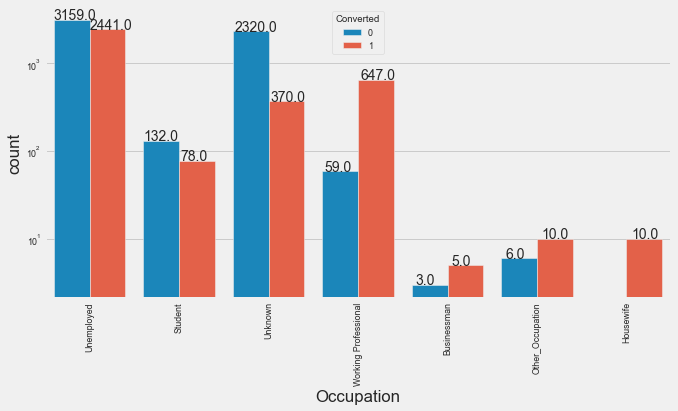

In [255]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = 'Occupation', hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Insight: 
- Despite their small number, housewives have a 100% conversion rate.
- Working professionals, business owners, and others have a high conversion rate.
- Despite the fact that the most individuals have been reached, the conversion rate (40%) is poor.

We are unable to mix smalled value categories since their conversion rates are so diverse. Combining them may result in incorrect forecasts.

#### Search, Newspaper, Newspaper Article, Digital Advertisement, ,X Education Forums, Free Copy
There are just two categories for the following features. We'll assess the skewness of the data and determine whether to eliminate it from model construction.

In [78]:
def pieplot(col):
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    converted = lead[col].value_counts().rename_axis('unique_values').to_frame('counts')
    plt.pie(converted.counts, labels = ["No","Yes"],colors = ['red','green'],autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(col)

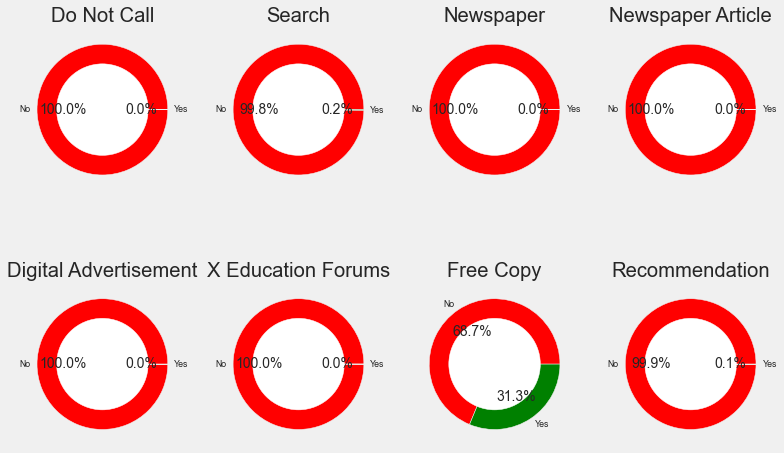

In [79]:
# Lets lookinto the data distribution of the following columns
col = ['Do Not Call','Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums', 'Free Copy','Recommendation']
plt.figure(figsize = (12,8))
i=1
for each_col in col:
    plt.subplot(2,4,i)
    pieplot(each_col)
    i+=1

In [256]:
#Run the function to get plot categorical plots
univariate_categorical('Free Copy',label_rotation=True)

NameError: name 'univariate_categorical' is not defined

In [257]:
lead['Free Copy'].describe()

count     9240
unique    2   
top       No  
freq      6352
Name: Free Copy, dtype: object

In [258]:
lead['Free Copy'].value_counts()

No     6352
Yes    2888
Name: Free Copy, dtype: int64

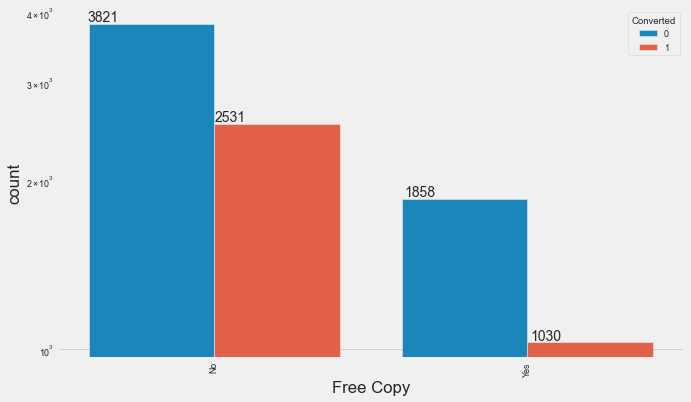

In [260]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = 'Free Copy', hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Strategy: Search, Newspaper, Newspaper Article, Digital Advertisement, X Education Forums, and Recommendation data are extremely biased and should be removed because they provide no value to the model.
Distributing a free copy of the Mastering Interview does not appear to provide much value because the coenversion rate is about the same. All of these columns will be removed.

In [265]:
lead.drop(col,axis = 1, inplace = True)
len(lead.columns)

KeyError: "['Specialization_Travel and Tourism'] not found in axis"

### Univariate Analysis - Numerical

In [82]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation'],
      dtype='object')

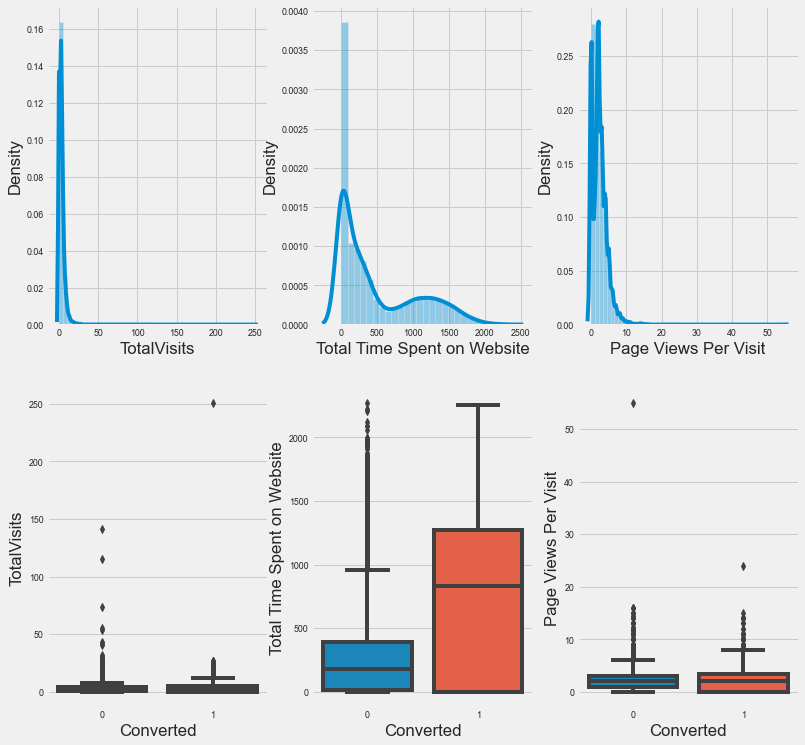

In [83]:
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(12,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.distplot(lead[col])
    plt.subplot(2,3,3+i)
    sns.boxplot(y=lead[col], x = lead['Converted'])
    i+=1

Insight: There are certain outliers in TotalVisits and Page Views per Visit that must be addressed.

### Bivariate Analysis

<Figure size 1440x1440 with 0 Axes>

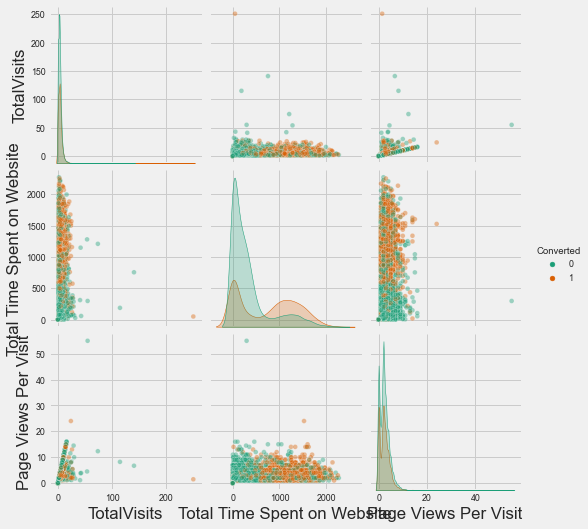

In [84]:
plt.figure(figsize =(20,20))
sns.pairplot(lead[numerical_col],hue="Converted",kind='scatter', plot_kws={'alpha':0.4},palette = 'Dark2')                                  
plt.show()

Insight: The distribution of data is not typical.

## Data Preparation
### Outliers Treatment

In [85]:
#Checking the detailed percentile values
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


In [86]:
numerical_col

array(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'], dtype=object)

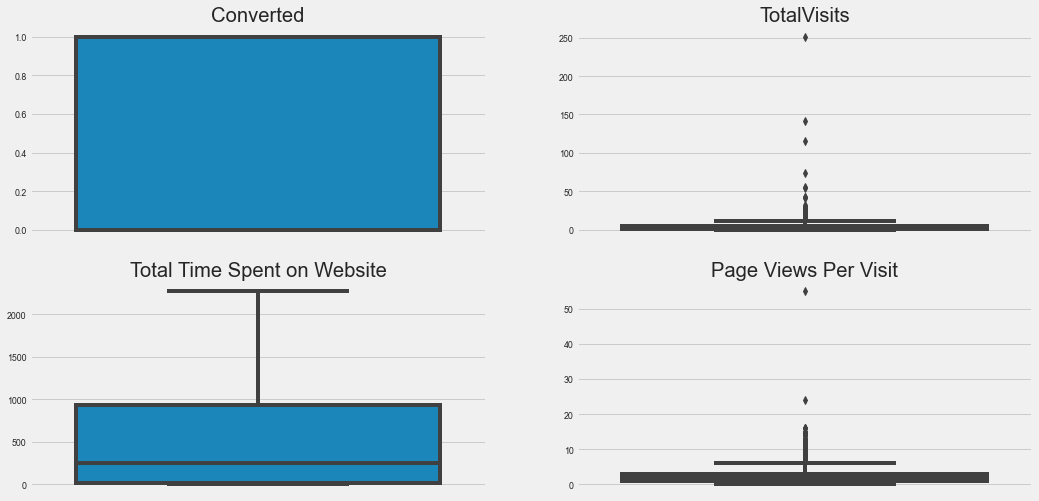

In [87]:
#Plotting the numerical columns for outlier values
i=1
plt.figure(figsize=[16,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

Insight: Outliers in TotalVisits and Page Views Per Visit may show accurate numbers, but they will misclassify the outcomes and cause issues when forming inferences using the incorrect model. Outliers have a large effect on logistic regression. So, for the following reasons, let's limit TotalVisits and Page Views Per Visit to the 95th percentile:
- The number of records in the data collection is rather large.
- Because the 95th and 99th percentiles of these columns are so close, the impact of capping to the 95th or 99th percentile will be the same.

In [88]:
#Capping the data at 95% percetile value
Q4 = lead['TotalVisits'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for TotalVisits column : ",len(lead[lead['TotalVisits'] >= Q4]))
lead.loc[lead['TotalVisits'] >= Q4, 'TotalVisits'] = Q4 # outlier capping

Q4 = lead['Page Views Per Visit'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for Page Views Per Visit column : ",len(lead[lead['Page Views Per Visit'] >= Q4]))
lead.loc[lead['Page Views Per Visit'] >= Q4, 'Page Views Per Visit'] = Q4 # outlier capping

Total number of rows getting capped for TotalVisits column :  467
Total number of rows getting capped for Page Views Per Visit column :  604


Insight: The number of rows that are capped is quite large. This is also why we are capping the data rather than deleting it.

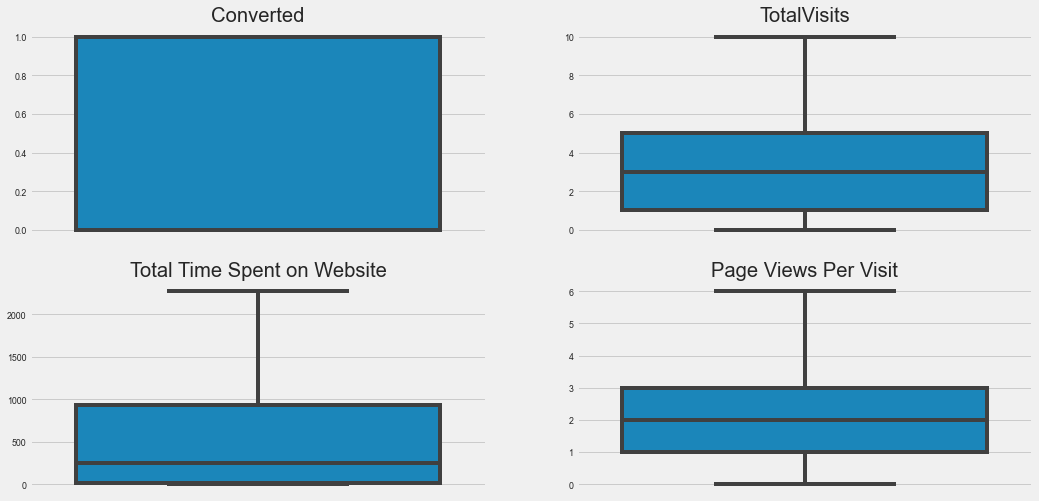

In [89]:
#replotting the graphs to check for outlier treatment
i=1
plt.figure(figsize=[16,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

In [90]:
# Checking the percentile values again 
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.179221,487.698268,2.255105
std,0.486714,2.761219,548.021466,1.779471
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


Insight: Let's move on to data preparation for model creation now that we've capped the outliers.

### Convert Binary Categories

In [91]:
# Checking the unique value counts for categorcial columns
lead.nunique().sort_values()

Do Not Email                   2   
Converted                      2   
Lead Origin                    5   
Occupation                     7   
Lead Source                    9   
TotalVisits                    11  
Last Activity                  11  
Specialization                 19  
Page Views Per Visit           91  
Total Time Spent on Website    1731
dtype: int64

In [92]:
# Checking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

No     8506
Yes    734 
Name: Do Not Email, dtype: int64

In [93]:
# List of variables to map

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead YES/NO variable list
lead['Do Not Email'] = lead[['Do Not Email']].apply(binary_map)

In [94]:
# rechecking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

0    8506
1    734 
Name: Do Not Email, dtype: int64

### Dummy Variables

In [95]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [96]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization'], axis=1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Facebook                      9240 non-null   uint8  
 10  Lead Source_Google                  

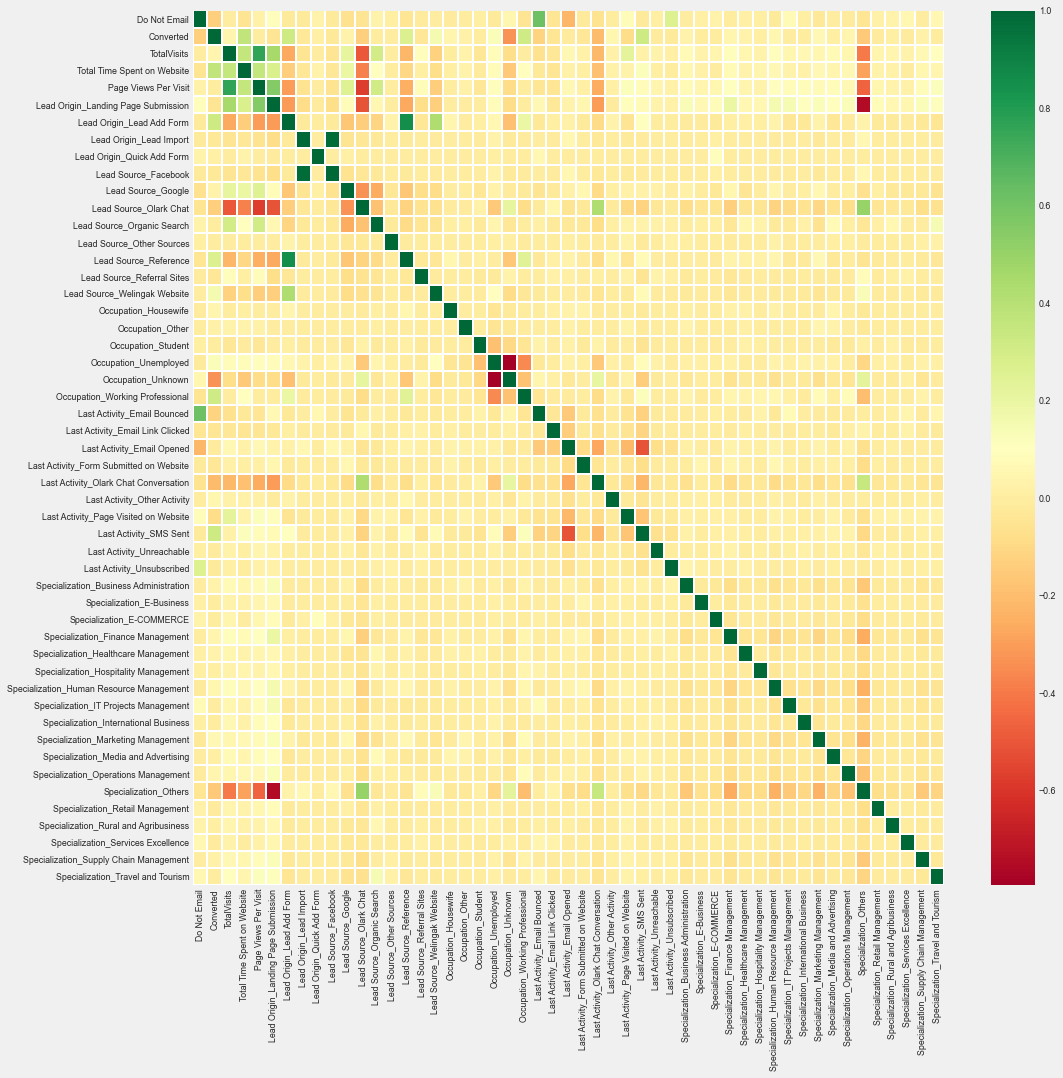

In [97]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(lead.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [98]:
print('Total number of columns after One-Hot Encoding : ',len(lead.columns))

Total number of columns after One-Hot Encoding :  51


Insight: Heatmap has 51 columns, making it tough to read. Let's have a look at the top 5 positively and adversely associated traits.

In [99]:
corr_lead = lead.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
466,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
720,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
206,Page Views Per Visit,TotalVisits,0.767585
1173,Last Activity_Email Bounced,Do Not Email,0.618470
259,Lead Origin_Landing Page Submission,Page Views Per Visit,0.553423


In [100]:
corr_df.sort_values(by='Correlation', ascending=True, inplace=True)

# Top 5 Negatively correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
1091,Occupation_Unknown,Occupation_Unemployed,-0.794875
2300,Specialization_Others,Lead Origin_Landing Page Submission,-0.748263
565,Lead Source_Olark Chat,Page Views Per Visit,-0.573334
566,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
1555,Last Activity_SMS Sent,Last Activity_Email Opened,-0.512325


### Train - Test Split

In [101]:
# target variable
Y = lead['Converted']
X = lead.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [102]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (6468, 50)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 50)
 Shape of y_test is  :  (2772,)


### Feature Scaling
If the numerical properties were measured on multiple scales, we normalized them such that they all had a common mean of zero.

In [103]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6795,0,0.299722,0.005716,-0.516439,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8105,0,0.662077,1.365219,1.553761,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Insight: Let's attempt developing a model using Logistic Regression now that we have our Train and Test data bases available and the Train database normalized.
## Model Building
### RFE for Feature Reduction

In [104]:
# Using RFE to reduce the feature count from 54 to 20
logreg = LogisticRegression()
rfe = RFE(logreg, 20)           
rfe = rfe.fit(X_train, y_train)

In [105]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Other Sources', False, 3),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', False, 7),
 ('Occupation_Student', False, 9),
 ('Occupation_Unemployed', False, 8),
 ('Occupation_Unknown', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', True, 1),
 ('La

In [106]:
#checking which columns remained after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Occupation_Housewife',
       'Occupation_Unknown', 'Occupation_Working Professional',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness'],
      dtype='object')

In [107]:
#Columns which have been removed after RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other Sources',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'S

In [108]:
# Functions to repeat Logictis regression model and VIF calculation repeatedly

# function to build logistic regression model
def build_logistic_model(feature_list):
    X_train_local = X_train[feature_list] # get feature list for VIF
    X_train_sm = sm.add_constant(X_train_local) # required by statsmodels   
    log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit() # build model and learn coefficients  
    return(log_model, X_train_sm) # return the model and the X_train fitted with constant 

#function to calculate VIF
def calculate_VIF(X_train):  # Calculate VIF for features
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) # returns the calculated VIFs for all the features

### Manual Feature Reduction
Strategy:
For Manual Feature Reduction, the following approaches will be used to lower the features till we achieve a suitable number of features while maintaining Sensitivity of the Modeal =>80%.

1. High P-Value
2. High VIF
3. High negative GLM coeeficient
4. Low Information Value (IV) generated based on WoE (Weight of Evidence)
### Model 1

In [109]:
features = list(rfe_col) #  Use RFE selected variables
log_model1, X_train_sm1 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.5
Date:                Wed, 15 Dec 2021   Deviance:                       5200.9
Time:                        10:45:29   Pearson chi2:                 8.03e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7869      0.150     -5.233      0.000      -1.082      -0.492
Do Not Email                             -1.1731      0.182     -6.435      0.000      -1.530      -0.816
Total Time Spent on Website               1.0654      0.040     26.623      0.000       0.987       1.144
Lead Origin_Landing Page Submission      -1.0426      0.129     -8.058      0.000      -1.296      -0.789
Lead Origin_Lead Add Form                 2.7686      0.204     13.566      0.000       2.369       3.169
Lead Source_Facebook                     -0.6626      0.523     -1.267      0.205      -1.687       0.362
Lead Source_Olark Chat                    1.0824      0.124      8.742      0.000       0.840       1.325
Lead Source_Welingak Website              2.4808      0.750      3.309      0.001       1.011       3.950
Occupation_Housewife                     22.7618   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
Occupation_Unknown                       -1.0783      0.088    -12.306      0.000      -1.250      -0.907
Occupation_Working Professional           2.4080      0.190     12.683      0.000       2.036       2.780
Last Activity_Email Opened                0.7348      0.110      6.660      0.000       0.519       0.951
Last Activity_Olark Chat Conversation    -0.6021      0.192     -3.141      0.002      -0.978      -0.226
Last Activity_Other Activity              2.2497      0.488      4.608      0.000       1.293       3.207
Last Activity_SMS Sent                    1.8816      0.112     16.847      0.000       1.663       2.100
Last Activity_Unreachable                 0.8678      0.368      2.361      0.018       0.147       1.588
Last Activity_Unsubscribed                1.3689      0.484      2.829      0.005       0.421       2.317
Specialization_Hospitality Management    -0.9777      0.328     -2.978      0.003      -1.621      -0.334
Specialization_Others                    -0.9752      0.124     -7.870      0.000      -1.218      -0.732
Specialization_Retail Management         -0.4160      0.337     -1.236      0.217      -1.076       0.244
Specialization_Rural and Agribusiness     0.5288      0.390      1.357      0.175      -0.235       1.293
=========================================================================================================
"""

In [110]:
#Checking VIF values
calculate_VIF(X_train)

,Features,VIF
19,Occupation_Unemployed,38.68
20,Occupation_Unknown,19.85
5,Lead Origin_Lead Add Form,17.14
6,Lead Origin_Lead Import,16.90
8,Lead Source_Facebook,16.86
44,Specialization_Others,14.44
13,Lead Source_Reference,14.08
24,Last Activity_Email Opened,10.05
4,Lead Origin_Landing Page Submission,8.48
29,Last Activity_SMS Sent,8.16


### Model 2
Strategy:
Due to the high P-value of 0.999, we will eliminate the 'Occupation Housewife' feature.

In [111]:
features.remove('Occupation_Housewife') # Remove 'Occupation_Housewife number' from RFE features list
log_model2, X_train_sm2 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.0
Date:                Wed, 15 Dec 2021   Deviance:                       5214.0
Time:                        10:46:53   Pearson chi2:                 8.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7773      0.150     -5.180      0.000      -1.071      -0.483
Do Not Email                             -1.1788      0.182     -6.468      0.000      -1.536      -0.822
Total Time Spent on Website               1.0644      0.040     26.627      0.000       0.986       1.143
Lead Origin_Landing Page Submission      -1.0381      0.129     -8.029      0.000      -1.292      -0.785
Lead Origin_Lead Add Form                 2.7849      0.204     13.661      0.000       2.385       3.184
Lead Source_Facebook                     -0.6639      0.523     -1.270      0.204      -1.688       0.360
Lead Source_Olark Chat                    1.0818      0.124      8.740      0.000       0.839       1.324
Lead Source_Welingak Website              2.4637      0.750      3.286      0.001       0.994       3.933
Occupation_Unknown                       -1.0822      0.088    -12.359      0.000      -1.254      -0.911
Occupation_Working Professional           2.3994      0.190     12.643      0.000       2.027       2.771
Last Activity_Email Opened                0.7327      0.110      6.663      0.000       0.517       0.948
Last Activity_Olark Chat Conversation    -0.6074      0.192     -3.171      0.002      -0.983      -0.232
Last Activity_Other Activity              2.2402      0.488      4.588      0.000       1.283       3.197
Last Activity_SMS Sent                    1.8716      0.111     16.805      0.000       1.653       2.090
Last Activity_Unreachable                 0.8567      0.368      2.331      0.020       0.136       1.577
Last Activity_Unsubscribed                1.3645      0.484      2.820      0.005       0.416       2.313
Specialization_Hospitality Management    -0.9849      0.328     -3.000      0.003      -1.628      -0.341
Specialization_Others                    -0.9793      0.124     -7.907      0.000      -1.222      -0.737
Specialization_Retail Management         -0.4224      0.336     -1.256      0.209      -1.082       0.237
Specialization_Rural and Agribusiness     0.5204      0.390      1.336      0.182      -0.243       1.284
=========================================================================================================
"""

In [112]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.00
16,Specialization_Others,2.78
9,Last Activity_Email Opened,2.57
12,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
10,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
7,Occupation_Unknown,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


### Model 3
Strategy: Due to the high P-value of 0.209, we will eliminate the 'Specialization Retail Management' function.

In [113]:
features.remove('Specialization_Retail Management')
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.8
Date:                Wed, 15 Dec 2021   Deviance:                       5215.6
Time:                        10:50:01   Pearson chi2:                 8.10e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7834      0.150     -5.222      0.000      -1.077      -0.489
Do Not Email                             -1.1828      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website               1.0628      0.040     26.621      0.000       0.985       1.141
Lead Origin_Landing Page Submission      -1.0411      0.129     -8.050      0.000      -1.295      -0.788
Lead Origin_Lead Add Form                 2.7834      0.204     13.653      0.000       2.384       3.183
Lead Source_Facebook                     -0.6640      0.522     -1.271      0.204      -1.688       0.360
Lead Source_Olark Chat                    1.0789      0.124      8.719      0.000       0.836       1.321
Lead Source_Welingak Website              2.4644      0.750      3.287      0.001       0.995       3.934
Occupation_Unknown                       -1.0816      0.088    -12.353      0.000      -1.253      -0.910
Occupation_Working Professional           2.3991      0.190     12.636      0.000       2.027       2.771
Last Activity_Email Opened                0.7357      0.110      6.692      0.000       0.520       0.951
Last Activity_Olark Chat Conversation    -0.6033      0.192     -3.150      0.002      -0.979      -0.228
Last Activity_Other Activity              2.2470      0.488      4.604      0.000       1.290       3.204
Last Activity_SMS Sent                    1.8734      0.111     16.819      0.000       1.655       2.092
Last Activity_Unreachable                 0.8548      0.368      2.320      0.020       0.133       1.577
Last Activity_Unsubscribed                1.3745      0.484      2.841      0.004       0.426       2.323
Specialization_Hospitality Management    -0.9772      0.328     -2.977      0.003      -1.621      -0.334
Specialization_Others                    -0.9745      0.124     -7.869      0.000      -1.217      -0.732
Specialization_Rural and Agribusiness     0.5275      0.389      1.354      0.176      -0.236       1.291
=========================================================================================================
"""

In [114]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.99
16,Specialization_Others,2.78
9,Last Activity_Email Opened,2.57
12,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
10,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
7,Occupation_Unknown,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


### Model 4
Strategy: Due to the high P-Value of 0.204, we will deactivate the 'Lead Source Facebook' option.

In [115]:
features.remove('Lead Source_Facebook')
log_model4, X_train_sm4 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.7
Date:                Wed, 15 Dec 2021   Deviance:                       5217.4
Time:                        10:51:13   Pearson chi2:                 8.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7996      0.149     -5.351      0.000      -1.092      -0.507
Do Not Email                             -1.1830      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website               1.0655      0.040     26.715      0.000       0.987       1.144
Lead Origin_Landing Page Submission      -1.0226      0.128     -7.968      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                 2.8043      0.203     13.797      0.000       2.406       3.203
Lead Source_Olark Chat                    1.0978      0.123      8.926      0.000       0.857       1.339
Lead Source_Welingak Website              2.4624      0.750      3.284      0.001       0.993       3.932
Occupation_Unknown                       -1.0808      0.088    -12.341      0.000      -1.252      -0.909
Occupation_Working Professional           2.3977      0.190     12.633      0.000       2.026       2.770
Last Activity_Email Opened                0.7300      0.110      6.643      0.000       0.515       0.945
Last Activity_Olark Chat Conversation    -0.6028      0.192     -3.147      0.002      -0.978      -0.227
Last Activity_Other Activity              2.2481      0.488      4.604      0.000       1.291       3.205
Last Activity_SMS Sent                    1.8703      0.111     16.792      0.000       1.652       2.089
Last Activity_Unreachable                 0.8558      0.369      2.322      0.020       0.134       1.578
Last Activity_Unsubscribed                1.3743      0.484      2.840      0.005       0.426       2.323
Specialization_Hospitality Management    -0.9888      0.327     -3.020      0.003      -1.630      -0.347
Specialization_Others                    -0.9715      0.124     -7.861      0.000      -1.214      -0.729
Specialization_Rural and Agribusiness     0.5291      0.390      1.358      0.174      -0.234       1.293
=========================================================================================================
"""

In [116]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.98
15,Specialization_Others,2.77
8,Last Activity_Email Opened,2.55
11,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
9,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
6,Occupation_Unknown,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


### Model 5
Strategy: Due to the high P-Value of 0.174, we will eliminate the 'Specialization Rural and Agribusiness' feature. All of the parameters have VIF values less than 3, indicating that the features are not multi-colinear.

In [117]:
features.remove('Specialization_Rural and Agribusiness')
log_model5, X_train_sm5 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.6
Date:                Wed, 15 Dec 2021   Deviance:                       5219.2
Time:                        10:52:51   Pearson chi2:                 8.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7911      0.149     -5.302      0.000      -1.084      -0.499
Do Not Email                             -1.1811      0.182     -6.492      0.000      -1.538      -0.824
Total Time Spent on Website               1.0651      0.040     26.711      0.000       0.987       1.143
Lead Origin_Landing Page Submission      -1.0227      0.128     -7.972      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                 2.8029      0.203     13.794      0.000       2.405       3.201
Lead Source_Olark Chat                    1.0993      0.123      8.940      0.000       0.858       1.340
Lead Source_Welingak Website              2.4629      0.750      3.285      0.001       0.993       3.932
Occupation_Unknown                       -1.0818      0.088    -12.357      0.000      -1.253      -0.910
Occupation_Working Professional           2.3966      0.190     12.627      0.000       2.025       2.769
Last Activity_Email Opened                0.7288      0.110      6.636      0.000       0.514       0.944
Last Activity_Olark Chat Conversation    -0.6068      0.191     -3.169      0.002      -0.982      -0.231
Last Activity_Other Activity              2.2419      0.488      4.592      0.000       1.285       3.199
Last Activity_SMS Sent                    1.8672      0.111     16.782      0.000       1.649       2.085
Last Activity_Unreachable                 0.8487      0.368      2.303      0.021       0.126       1.571
Last Activity_Unsubscribed                1.3906      0.485      2.865      0.004       0.439       2.342
Specialization_Hospitality Management    -0.9951      0.327     -3.040      0.002      -1.637      -0.353
Specialization_Others                    -0.9785      0.123     -7.927      0.000      -1.220      -0.737
=========================================================================================================
"""

In [118]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.97
15,Specialization_Others,2.77
8,Last Activity_Email Opened,2.55
11,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
9,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
6,Occupation_Unknown,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


### Model 6
Strategy:
All of the characteristics show significant P Values and VIFs that are less than 5. So, to eliminate parameters, we'll look at WoE and Coefficient value. We will focus on removing negative coefficients since we want more positive features that can signal selecting the correct candidate for lead conversion or how to enhance future leads.

In [119]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [120]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

IV score of column :  Do Not Email  is  0.0954
IV score of column :  Total Time Spent on Website  is  0.6012
IV score of column :  Lead Origin_Landing Page Submission  is  0.0111
IV score of column :  Lead Origin_Lead Add Form  is  0.5615
IV score of column :  Lead Source_Olark Chat  is  0.0763
IV score of column :  Lead Source_Welingak Website  is  0.1853
IV score of column :  Occupation_Unknown  is  0.5436
IV score of column :  Occupation_Working Professional  is  0.5227
IV score of column :  Last Activity_Email Opened  is  0.0008
IV score of column :  Last Activity_Olark Chat Conversation  is  0.2711
IV score of column :  Last Activity_Other Activity  is  0.0115
IV score of column :  Last Activity_SMS Sent  is  0.4467
IV score of column :  Last Activity_Unreachable  is  0.0005
IV score of column :  Last Activity_Unsubscribed  is  0.002
IV score of column :  Specialization_Hospitality Management  is  0.0003
IV score of column :  Specialization_Others  is  0.1036


Strategy:
Due to the large negative coefficient, we will delete the 'Occupation Unknown' feature. Furthermore, Occupation Unknown is data that is imputed by handling null values. This feature indicates that some leads have not completed the Occupation column. It will be difficult to comprehend and act on this trait in the future. As a result, we will remove this functionality first.

In [121]:
features.remove('Occupation_Unknown')
log_model6, X_train_sm6 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.6
Date:                Wed, 15 Dec 2021   Deviance:                       5385.3
Time:                        10:56:44   Pearson chi2:                 9.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.9498      0.147     -6.462      0.000      -1.238      -0.662
Do Not Email                             -1.2101      0.180     -6.737      0.000      -1.562      -0.858
Total Time Spent on Website               1.0645      0.039     27.173      0.000       0.988       1.141
Lead Origin_Landing Page Submission      -1.1249      0.127     -8.858      0.000      -1.374      -0.876
Lead Origin_Lead Add Form                 3.0424      0.203     15.003      0.000       2.645       3.440
Lead Source_Olark Chat                    1.0190      0.121      8.453      0.000       0.783       1.255
Lead Source_Welingak Website              2.5641      0.751      3.416      0.001       1.093       4.035
Occupation_Working Professional           2.6324      0.190     13.826      0.000       2.259       3.006
Last Activity_Email Opened                0.7520      0.108      6.942      0.000       0.540       0.964
Last Activity_Olark Chat Conversation    -0.7008      0.189     -3.705      0.000      -1.072      -0.330
Last Activity_Other Activity              2.3149      0.477      4.848      0.000       1.379       3.251
Last Activity_SMS Sent                    1.9088      0.110     17.370      0.000       1.693       2.124
Last Activity_Unreachable                 0.9073      0.361      2.515      0.012       0.200       1.614
Last Activity_Unsubscribed                1.3455      0.485      2.776      0.005       0.396       2.295
Specialization_Hospitality Management    -1.0573      0.323     -3.273      0.001      -1.690      -0.424
Specialization_Others                    -1.1856      0.122     -9.724      0.000      -1.425      -0.947
=========================================================================================================
"""

In [122]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.81
14,Specialization_Others,2.58
7,Last Activity_Email Opened,2.54
10,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.16
8,Last Activity_Olark Chat Conversation,1.75
3,Lead Origin_Lead Add Form,1.63
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.25


### Model 7

In [123]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

IV score of column :  Do Not Email  is  0.0954
IV score of column :  Total Time Spent on Website  is  0.6012
IV score of column :  Lead Origin_Landing Page Submission  is  0.0111
IV score of column :  Lead Origin_Lead Add Form  is  0.5615
IV score of column :  Lead Source_Olark Chat  is  0.0763
IV score of column :  Lead Source_Welingak Website  is  0.1853
IV score of column :  Occupation_Working Professional  is  0.5227
IV score of column :  Last Activity_Email Opened  is  0.0008
IV score of column :  Last Activity_Olark Chat Conversation  is  0.2711
IV score of column :  Last Activity_Other Activity  is  0.0115
IV score of column :  Last Activity_SMS Sent  is  0.4467
IV score of column :  Last Activity_Unreachable  is  0.0005
IV score of column :  Last Activity_Unsubscribed  is  0.002
IV score of column :  Specialization_Hospitality Management  is  0.0003
IV score of column :  Specialization_Others  is  0.1036


Strategy: 
We shall eliminate 'Specialization Others' owing to the data's difficulties in interpretation, since this "Other" category is a collection of different specializations that have been combined in smaller pieces.

In [124]:
features.remove('Specialization_Others')
log_model7, X_train_sm7 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.6
Date:                Wed, 15 Dec 2021   Deviance:                       5483.2
Time:                        10:58:25   Pearson chi2:                 8.56e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8587      0.114    -16.247      0.000      -2.083      -1.634
Do Not Email                             -1.2343      0.179     -6.904      0.000      -1.585      -0.884
Total Time Spent on Website               1.0914      0.039     28.047      0.000       1.015       1.168
Lead Origin_Landing Page Submission      -0.2458      0.087     -2.821      0.005      -0.417      -0.075
Lead Origin_Lead Add Form                 3.4428      0.198     17.359      0.000       3.054       3.832
Lead Source_Olark Chat                    0.9740      0.117      8.346      0.000       0.745       1.203
Lead Source_Welingak Website              1.9818      0.747      2.652      0.008       0.517       3.446
Occupation_Working Professional           2.8261      0.186     15.157      0.000       2.461       3.192
Last Activity_Email Opened                0.7555      0.107      7.052      0.000       0.545       0.965
Last Activity_Olark Chat Conversation    -0.7715      0.184     -4.189      0.000      -1.132      -0.411
Last Activity_Other Activity              2.3341      0.481      4.855      0.000       1.392       3.276
Last Activity_SMS Sent                    1.8690      0.109     17.190      0.000       1.656       2.082
Last Activity_Unreachable                 0.9374      0.358      2.621      0.009       0.236       1.638
Last Activity_Unsubscribed                1.3479      0.478      2.819      0.005       0.411       2.285
Specialization_Hospitality Management    -0.8762      0.318     -2.756      0.006      -1.499      -0.253
=========================================================================================================
"""

In [125]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.39
4,Lead Source_Olark Chat,1.98
7,Last Activity_Email Opened,1.97
10,Last Activity_SMS Sent,1.84
3,Lead Origin_Lead Add Form,1.62
8,Last Activity_Olark Chat Conversation,1.48
1,Total Time Spent on Website,1.25
5,Lead Source_Welingak Website,1.24
0,Do Not Email,1.21
6,Occupation_Working Professional,1.18


### Model 8

In [126]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

IV score of column :  Do Not Email  is  0.0954
IV score of column :  Total Time Spent on Website  is  0.6012
IV score of column :  Lead Origin_Landing Page Submission  is  0.0111
IV score of column :  Lead Origin_Lead Add Form  is  0.5615
IV score of column :  Lead Source_Olark Chat  is  0.0763
IV score of column :  Lead Source_Welingak Website  is  0.1853
IV score of column :  Occupation_Working Professional  is  0.5227
IV score of column :  Last Activity_Email Opened  is  0.0008
IV score of column :  Last Activity_Olark Chat Conversation  is  0.2711
IV score of column :  Last Activity_Other Activity  is  0.0115
IV score of column :  Last Activity_SMS Sent  is  0.4467
IV score of column :  Last Activity_Unreachable  is  0.0005
IV score of column :  Last Activity_Unsubscribed  is  0.002
IV score of column :  Specialization_Hospitality Management  is  0.0003


Strategy:
We will delete 'Specialization Hospitality Management' since it has the lowest WoE value and a negative coefficient value.

In [127]:
features.remove('Specialization_Hospitality Management')
log_model8, X_train_sm8 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2745.5
Date:                Wed, 15 Dec 2021   Deviance:                       5491.0
Time:                        10:59:34   Pearson chi2:                 8.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8600      0.114    -16.274      0.000      -2.084      -1.636
Do Not Email                             -1.2357      0.179     -6.916      0.000      -1.586      -0.886
Total Time Spent on Website               1.0867      0.039     28.001      0.000       1.011       1.163
Lead Origin_Landing Page Submission      -0.2556      0.087     -2.937      0.003      -0.426      -0.085
Lead Origin_Lead Add Form                 3.4094      0.197     17.300      0.000       3.023       3.796
Lead Source_Olark Chat                    0.9719      0.117      8.333      0.000       0.743       1.201
Lead Source_Welingak Website              2.0138      0.747      2.696      0.007       0.550       3.478
Occupation_Working Professional           2.8176      0.186     15.122      0.000       2.452       3.183
Last Activity_Email Opened                0.7551      0.107      7.056      0.000       0.545       0.965
Last Activity_Olark Chat Conversation    -0.7730      0.184     -4.200      0.000      -1.134      -0.412
Last Activity_Other Activity              2.3422      0.480      4.878      0.000       1.401       3.283
Last Activity_SMS Sent                    1.8669      0.109     17.194      0.000       1.654       2.080
Last Activity_Unreachable                 0.9287      0.357      2.603      0.009       0.229       1.628
Last Activity_Unsubscribed                1.3208      0.483      2.736      0.006       0.375       2.267
=========================================================================================================
"""

In [128]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.38
4,Lead Source_Olark Chat,1.98
7,Last Activity_Email Opened,1.97
10,Last Activity_SMS Sent,1.84
3,Lead Origin_Lead Add Form,1.62
8,Last Activity_Olark Chat Conversation,1.48
1,Total Time Spent on Website,1.25
5,Lead Source_Welingak Website,1.24
0,Do Not Email,1.21
6,Occupation_Working Professional,1.18


### Model 9
Strategy:
We will eliminate the field 'Last Activity Other Activity' since it was produced by merging numerous smaller categories of Last Activity and the percentage of this data in the whole database is less than 0.03 percent.

In [129]:
features.remove('Last Activity_Other Activity')
log_model9, X_train_sm9 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2758.3
Date:                Wed, 15 Dec 2021   Deviance:                       5516.7
Time:                        11:01:19   Pearson chi2:                 7.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.7701      0.111    -15.899      0.000      -1.988      -1.552
Do Not Email                             -1.2616      0.177     -7.108      0.000      -1.609      -0.914
Total Time Spent on Website               1.0870      0.039     28.093      0.000       1.011       1.163
Lead Origin_Landing Page Submission      -0.2549      0.087     -2.937      0.003      -0.425      -0.085
Lead Origin_Lead Add Form                 3.4204      0.197     17.398      0.000       3.035       3.806
Lead Source_Olark Chat                    0.9755      0.116      8.381      0.000       0.747       1.204
Lead Source_Welingak Website              1.9893      0.746      2.667      0.008       0.527       3.451
Occupation_Working Professional           2.8353      0.186     15.259      0.000       2.471       3.200
Last Activity_Email Opened                0.6630      0.104      6.373      0.000       0.459       0.867
Last Activity_Olark Chat Conversation    -0.8657      0.182     -4.748      0.000      -1.223      -0.508
Last Activity_SMS Sent                    1.7766      0.106     16.813      0.000       1.569       1.984
Last Activity_Unreachable                 0.8386      0.356      2.355      0.019       0.141       1.537
Last Activity_Unsubscribed                1.2519      0.482      2.596      0.009       0.307       2.197
=========================================================================================================
"""

In [130]:
# How many features in the model ?
len(features)

12

Inferences: Model No. 9 is a stable model in which all P-values of features are significant and VIF values are less than 3, indicating that multi-colinearity is insignificant. The majority of feature coefficients are positive. We will choose Model 8 as our final model and test it on the Train and Test Data Sets.
## Model Evalution : Train Dataset
### Evaluation Matrix Definitions
Confusion Matrix :
                    Predicted Negative(0)	Predicted Positive(1)
Actual Negative(0)	True Negative (TN)	    False Postive (FP)
Actual Positive(1)	False Negative (FN)	    True Positive (TP)

Accuracy = (TP + TN) / (TP + TN + FP + FN)

Sensitivity = TP / (TP + FN)

Specificity = TN / (TN + FP)

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F Measure (F1) = 2 * Precision * Recall / (Precision + Recall)

- TPR (True Positive Rate) = TP/(TP + FN)
- TNR (True Negative Rate) = TN/(TN + FP)
- FPR (False Positive Rate) = FP/(TN + FP)
- FNR (False Negative Rate) = FN/(TP + FN)

In [133]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def lg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensi*100,2),"%")
    print ("Model Specificity value is           : ", round(speci*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    : ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(neg_pred_val*100,2),"%")

### Predicted Probability Calculation

In [134]:
# Getting the predicted values on the train set
y_train_pred = log_model9.predict(X_train_sm9)
y_train_pred[:10]

1871    0.250866
6795    0.204929
3516    0.292520
8105    0.774801
3934    0.250866
4844    0.990165
3297    0.103836
8071    0.985248
987     0.247592
7423    0.895929
dtype: float64

In [135]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25086573, 0.20492948, 0.29252038, 0.77480069, 0.25086573,
       0.99016497, 0.10383587, 0.98524792, 0.24759185, 0.89592931])

In [136]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
0,0,0.250866,1871
1,0,0.204929,6795
2,0,0.292520,3516
3,0,0.774801,8105
4,0,0.250866,3934


In [137]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.250866,1871,1,1,1,0,0,0,0,0,0,0
1,0,0.204929,6795,1,1,1,0,0,0,0,0,0,0
2,0,0.292520,3516,1,1,1,0,0,0,0,0,0,0
3,0,0.774801,8105,1,1,1,1,1,1,1,1,0,0
4,0,0.250866,3934,1,1,1,0,0,0,0,0,0,0


In [138]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df

,prob,accuracy,sensi,speci,Precision,Recall
0.0,0.0,0.381262,1.000000,0.000000,1.000000,0.000000
0.1,0.1,0.591218,0.969181,0.358321,0.482049,0.969181
0.2,0.2,0.729128,0.917275,0.613193,0.593701,0.917275
0.3,0.3,0.796537,0.828873,0.776612,0.695711,0.828873
0.4,0.4,0.812616,0.756285,0.847326,0.753231,0.756285
0.5,0.5,0.811843,0.695864,0.883308,0.786074,0.695864
0.6,0.6,0.789889,0.578264,0.920290,0.817192,0.578264
0.7,0.7,0.775046,0.503244,0.942529,0.843644,0.503244
0.8,0.8,0.743816,0.376723,0.970015,0.885605,0.376723
0.9,0.9,0.711503,0.262774,0.988006,0.931034,0.262774


<Figure size 1296x576 with 0 Axes>

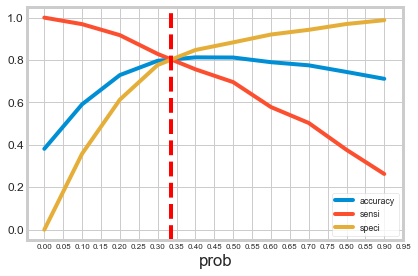

In [139]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.335, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

Inferences:
According to the graph above, 0.335 appears to be an appropriate cut-off point.

In [140]:
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.335 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1
0,0,0.250866,1871,0
1,0,0.204929,6795,0
2,0,0.292520,3516,0
3,0,0.774801,8105,1
4,0,0.250866,3934,0


In [141]:
# Let's assign Lead_score for the leads in Train Data Set
y_train_pred_final['lead_score_1']=(y_train_pred_final['Converted_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1,lead_score_1
4891,1,0.999521,8074,1,99
3115,1,0.999504,2656,1,99
6312,1,0.999146,3428,1,99
6187,1,0.998978,7579,1,99
5672,1,0.998885,6751,1,99
...,...,...,...,...,...
109,0,0.012122,6588,0,1
5487,0,0.011842,8678,0,1
747,0,0.011566,6283,0,1
2722,0,0.008259,7557,0,0


### Confusion Matrix

In [143]:
#Plotting the Confusion Matrix
draw_cm( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'], "GnBu")

NameError: name 'draw_cm' is not defined

In [144]:
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'] )
lg_metrics(conf_matrix)

Model Accuracy value is              :  80.55 %
Model Sensitivity value is           :  80.29 %
Model Specificity value is           :  80.71 %
Model Precision value is             :  71.95 %
Model Recall value is                :  80.29 %
Model True Positive Rate (TPR)       :  80.29 %
Model False Positive Rate (FPR)      :  19.29 %
Model Poitive Prediction Value is    :  71.95 %
Model Negative Prediction value is   :  86.92 %


In [145]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'] ) )

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4002
           1       0.72      0.80      0.76      2466

    accuracy                           0.81      6468
   macro avg       0.79      0.81      0.80      6468
weighted avg       0.81      0.81      0.81      6468



In [146]:
print("F1 Score: {}".format(f1_score(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'])))

F1 Score: 0.7589114603296281


Inferences:
Model 9 has an accuracy of 80.55 percent and a sensitivity of 80.29 percent with a cut off value of 0.335. In this situation, sensitivity refers to how many leads the model properly identifies out of all prospective leads who convert. In this case study, the CEO has asked for more than 80% of the budget. The model's F1 Score and accuracy value are greater for 0s than for 1s. This implies that the model predicts leads that will not convert more accurately than leads that will convert (i.e. filtering leads that will not convert). This indirectly increased the model's ability to identify appropriate leads to contact.

### ROC Curve

An ROC curve shows numerous things:

- It demonstrates the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity)
- The more closely the curve matches the ROC space's left-hand boundary and then its top border, the more accurate the test.
- The closer the curve gets to the ROC space's 45-degree diagonal, the less accurate the test.

In [147]:
# recoring the values FPR, TPR and Thresholds:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'] , drop_intermediate = False )

In [148]:
#plotting the ROC curve 
draw_roc(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

NameError: name 'draw_roc' is not defined

Inferences:
The ROC Curve aread is 0.88, indicating that the model is good.

### Precision - Recall Trade off

Next, we'll look at the Precision-Recall trade-off to determine if balancing these numbers yields better results.
Precision indicates how many of all leads forecasted at 1 have actually converted.
Recall signifies how many of all leads that converted were accurately identified as 1. This is the same as the sensitivity value.

When there is a large imbalance in data, the precision-recall trade-off point is employed to determine the cut-off point. The data distribution in our situation is 62 percent vs 38 percent. As a result, data imbalance is not a significant factor.

In [149]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

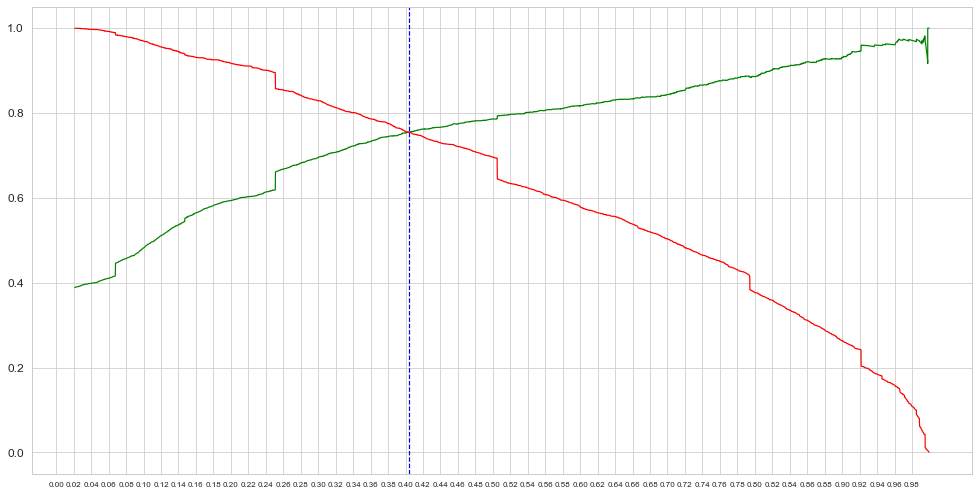

In [150]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.404, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

Inferences:
The cutoff point appears to be 0.404 based on the Precision-Recall Trade off curve. This threshold value will be used to evaluate test data.

In [151]:
# plotting the Train dataset again with 0.42 as cutoff
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.404 else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1,lead_score_1,final_predicted_2
0,0,0.250866,1871,0,25,0
1,0,0.204929,6795,0,20,0
2,0,0.292520,3516,0,29,0
3,0,0.774801,8105,1,77,1
4,0,0.250866,3934,0,25,0


In [152]:
#Plotting the Confusion Matrix
draw_cm( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'], "GnBu")

NameError: name 'draw_cm' is not defined

In [153]:
#Data based on cutoff received from Precision-Recall Trade off
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'] )
lg_metrics(conf_matrix)

Model Accuracy value is              :  81.32 %
Model Sensitivity value is           :  75.43 %
Model Specificity value is           :  84.96 %
Model Precision value is             :  75.55 %
Model Recall value is                :  75.43 %
Model True Positive Rate (TPR)       :  75.43 %
Model False Positive Rate (FPR)      :  15.04 %
Model Poitive Prediction Value is    :  75.55 %
Model Negative Prediction value is   :  84.87 %


In [154]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'] ) )

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4002
           1       0.76      0.75      0.75      2466

    accuracy                           0.81      6468
   macro avg       0.80      0.80      0.80      6468
weighted avg       0.81      0.81      0.81      6468



Inferences:
The model output has altered as a result of using the Precision - Recall trade off chart cut-off points:
- True Positive number has decreased.
- True Negative number has increase
- False Negative number has increase
- False Positive number has decreased

For our purposes, CEO wants to accurately identify the folks who will convert to leads. As a result, we cannot employ the Precision-Recall trade-off strategy since it reduces True Positive. To enhance True Positives, we must raise Sensitivity / Recall value. As a result, we'll select 0.335 as the cutoff value.

### Model Evalution : Test Dataset

In [155]:
# Scaling the test dataset :
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4269,0,1.749143,0.964504,2.117849,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2376,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7766,0,0.662077,-0.777416,1.553761,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9199,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4359,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [156]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[features]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Occupation_Working Professional,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
4269,0,0.964504,0,0,0,0,0,0,0,1,0,0
2376,0,-0.885371,0,1,0,0,0,0,0,1,0,0
7766,0,-0.777416,0,0,0,0,1,0,0,0,1,0
9199,0,-0.885371,0,0,1,0,0,0,1,0,0,0
4359,0,-0.885371,0,1,0,0,0,1,0,0,0,0


In [157]:
#adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Occupation_Working Professional', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed'],
      dtype='object')

In [158]:
# Predicting the final test model 
y_test_pred = log_model9.predict(X_test_sm)

In [159]:
#checking the top 10 rows
y_test_pred[:10]

4269    0.741716
2376    0.921619
7766    0.742460
9199    0.067694
4359    0.794282
9186    0.501616
1631    0.423215
8963    0.177048
8007    0.090863
5324    0.290588
dtype: float64

In [160]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.741716
2376,0.921619
7766,0.742460
9199,0.067694
4359,0.794282


In [161]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [162]:
# Putting CustID to index
y_test_df['Prospect_IND'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect_IND,0
0,1,4269,0.741716
1,1,2376,0.921619
2,1,7766,0.742460
3,0,9199,0.067694
4,1,4359,0.794282


In [163]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob
0,4269,1,0.741716
1,2376,1,0.921619
2,7766,1,0.742460
3,9199,0,0.067694
4,4359,1,0.794282


Strategy:
We will now employ the Sentivity - Specificity - Accuracy cut-off value of 0.335.

In [164]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.335 else 0)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted
0,4269,1,0.741716,1
1,2376,1,0.921619,1
2,7766,1,0.742460,1
3,9199,0,0.067694,0
4,4359,1,0.794282,1


In [165]:
#Plotting the Confusion Matrix
draw_cm( y_pred_final['Converted_IND'], y_pred_final['final_predicted'], "GnBu")

NameError: name 'draw_cm' is not defined

In [166]:
conf_matrix = confusion_matrix(y_pred_final['Converted_IND'], y_pred_final['final_predicted'])

lg_metrics(conf_matrix)

Model Accuracy value is              :  80.48 %
Model Sensitivity value is           :  80.09 %
Model Specificity value is           :  80.74 %
Model Precision value is             :  73.08 %
Model Recall value is                :  80.09 %
Model True Positive Rate (TPR)       :  80.09 %
Model False Positive Rate (FPR)      :  19.26 %
Model Poitive Prediction Value is    :  73.08 %
Model Negative Prediction value is   :  86.13 %


Inferences:
The sensitivity value for Test data is 80.09 percent, whereas it is 80.29 percent for Train data. The accuracy percentage is 80.48 percent. It demonstrates that the model performs well in the test data set as well and is not overtrained.

In [167]:
# Invoking the functio to draw ROC curve

draw_roc( y_pred_final['Converted_IND'], y_pred_final['Converted_Prob'])

NameError: name 'draw_roc' is not defined

Inferences:
The ROC score of 0.88 indicates that the model performed well in the Test dataset.

In [168]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_pred_final['Converted_IND'], y_pred_final['final_predicted'] ) )

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1677
           1       0.73      0.80      0.76      1095

    accuracy                           0.80      2772
   macro avg       0.80      0.80      0.80      2772
weighted avg       0.81      0.80      0.81      2772



In [169]:
# Let's assign Lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
546,3478,1,0.999470,1,99
745,6383,1,0.999440,1,99
2405,5921,1,0.999034,1,99
1091,818,1,0.998702,1,99
2150,133,1,0.997865,1,99
...,...,...,...,...,...
2146,5472,0,0.014585,0,1
796,6934,0,0.014528,0,1
17,3545,0,0.010709,0,1
1396,7046,0,0.010483,0,1


In [170]:
# checking the data from top 
y_pred_final.head(5)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
0,4269,1,0.741716,1,74
1,2376,1,0.921619,1,92
2,7766,1,0.742460,1,74
3,9199,0,0.067694,0,6
4,4359,1,0.794282,1,79


In [171]:
# checking the data from bottom 
y_pred_final.tail(5)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
2767,8649,0,0.082372,0,8
2768,2152,1,0.921619,1,92
2769,7101,0,0.250866,0,25
2770,5331,0,0.259089,0,25
2771,2960,1,0.921619,1,92


Inferences:
The lead score field may be used to determine which prospective leads to prioritize first. The bigger the score, the more likely it is that the lead will convert. If there are a limited number of sales professionals, the score cut-off should be higher to guarantee that persons with a greater conversion probability are contacted further to convert them into a potential client. It is the same as boosting the model's accuracy by altering the cut-off point to a higher value. If there are additional resources available on the sales team (for example, interns), the score cut-off might be decreased. Because the organization has more human resources, it can tolerate a greater percentage of false positives because it will boost customer outreach and, as a result, the number of potential customers who will take the online courses.
    
## Conclusion
### Model Features / Predictors

In [172]:
# Let's look into final model features and coefficients 
pd.options.display.float_format = '{:.2f}'.format
final_parameters = log_model9.params[1:]
final_parameters

Do Not Email                            -1.26
Total Time Spent on Website             1.09 
Lead Origin_Landing Page Submission     -0.25
Lead Origin_Lead Add Form               3.42 
Lead Source_Olark Chat                  0.98 
Lead Source_Welingak Website            1.99 
Occupation_Working Professional         2.84 
Last Activity_Email Opened              0.66 
Last Activity_Olark Chat Conversation   -0.87
Last Activity_SMS Sent                  1.78 
Last Activity_Unreachable               0.84 
Last Activity_Unsubscribed              1.25 
dtype: float64

In [173]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Do Not Email                            -36.88
Total Time Spent on Website             31.78 
Lead Origin_Landing Page Submission     -7.45 
Lead Origin_Lead Add Form               100.00
Lead Source_Olark Chat                  28.52 
Lead Source_Welingak Website            58.16 
Occupation_Working Professional         82.89 
Last Activity_Email Opened              19.38 
Last Activity_Olark Chat Conversation   -25.31
Last Activity_SMS Sent                  51.94 
Last Activity_Unreachable               24.52 
Last Activity_Unsubscribed              36.60 
dtype: float64

<Figure size 864x576 with 0 Axes>

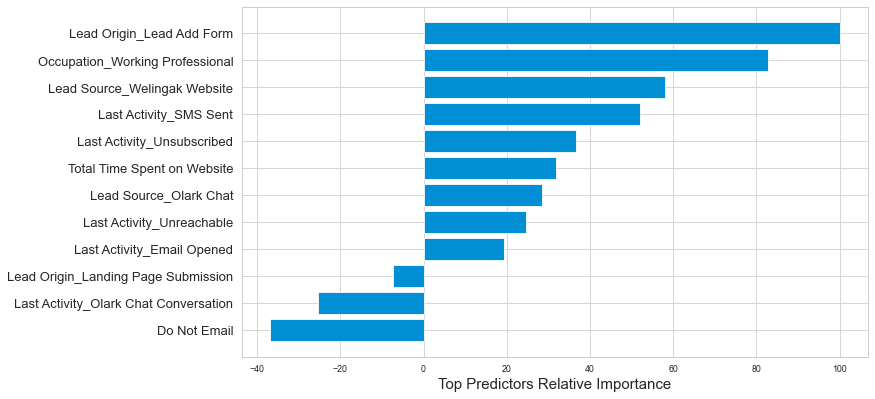

In [174]:
# Plotting the predictors based on their relative importance
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[features].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

### Model Summary
##### Interpretation Logistic regression model with multiple predictor variables
In general, we can have multiple predictor variables in a logistic regression model as below:
logit(p) = log(p/(1-p))= β0 + β1* X1 + … + βn * Xn

Using our example dataset as a basis, each estimated coefficient is the expected change in the log odds of being a potential lead for a unit increase in the corresponding predictor variable while holding the other predictor variables constant at a certain value. Each exponentiated coefficient is the ratio of two probabilities, or the change in odds on the multiplicative scale given a unit increase in the appropriate predictor variable while keeping the other variables constant.

##### The magnitude and sign of the coefficients loaded in the logit function:
logit(p) = log(p/(1-p)) = (3.42 * Lead Origin_Lead Add Form) + (2.84 * Occupation_Working Professional) + (1.99 * Lead Source_Welingak Website) + (1.78 * Last Activity_SMS Sent) + (1.25 * Last Activity_Unsubscribed) + (1.09 * Total Time Spent on Website) + (0.98 * Lead Source_Olark Chat) + (0.84 * Last Activity_Unreachable) + (0.66 * Last Activity_Email Opened) - (0.25 * Lead Origin_Landing Page Submission) -(0.87 * Last Activity_Olark Chat Conversation) - (1.26 * Do Not Email) -1.77

The estimations allow us to make forecasts. This is accomplished by estimating the effects of all predictors for a specific scenario, adding them up, and applying a logistic transformation.
Consider the case of a working professional who was recognized via the Welingak website, spoke on Olark Chat, spent little time on the website, and requested to be contacted through email.

Then we can calculate his conversion probability as 3.42 * 0 + 2.84 * 1 + 1.99 * 1 + 1.78 * 0 + 1.25 * 0 + 1.09 * 0 + 0.98 * 0 + 0.84 * 0 + 0.66 * 0 - 0.25 * 0 -0.87 * 1 - 1.26 * 0 -1.77 = 2.84 + 1.99 - 0.87 - 1.77 = 2.19 which is log(p/(1-p)).

The logistic transformation is:
Probability = 1 / (1 + exp(-x)) = 1 /(1 + exp(- -2.19)) = 1 /(1 + exp(2.2)) = 0.10 = 10%

##### Predicting Probabilities
We can create predictions based on the estimations. We do this by calculating the impacts of all of the predictors for a certain scenario, adding them up, and applying a logistic transformation.

Consider the case of a working professional who was recognized via the Welingak website, spoke on Olark Chat, spent little time on the website, and desired to be contacted through email.

Then we can calculate his conversion probability as 3.41 * 0 + 2.82 * 1 + 2.34 * 0 + 2.01 * 1 + 1.86 * 0 + 1.32 * 0 + 1.09 * 0 + 0.97 * 0 + 0.93 * 0 + 0.76 * 0 - 0.26 * 0 -0.77 * 1 - 1.24 * 0 -1.86
which is 2.82 + 2.01 - 0.77 - 1.86 = 2.2 which is log(p/(1-p))

The logistic transformation is:
Probability = 1 / (1 + exp(-x)) = 1 /(1 + exp(- -2.2)) = 1 /(1 + exp(2.2)) = 0.143 = 14.3%

##### Odds ratios
Because the idea of odds ratios is more social than rational, the marketing team may need to get odds rather than probabilities at times.

To understand odds ratios, we must first define odds, which is defined as the ratio of the probability of two mutually incompatible occurrences. Consider our forecast of a 10% lead conversion rate from the preceding section on probabilities. Because the likelihood of lead conversion is 10%, the probability of non-conversion is 100% - 10% = 90%, and hence the odds are 10% vs 90%. Dividing both sides by 90% yields 0.11 versus 1, which we can simply put as 0.11. So, the chances of 0.11 are simply another way of indicating a 10% chance of lead conversion.

Similarly, we can deduce from the model that, with all categorical and numerical variables held constant, the odds of a lead being converted for a Working Professional (Working Professional = 1) over the odds of a lead being converted for a non-working professional (Working Professional = 0) are exp(.2.84) = 17.11.

This means log(p/(1-p)) = 17.11 when all other variables are at fixed value

We can use this odds ratios method to identify the potential lead conversions on comparing the individuals profile.

Thank you!